In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

output_path = 'C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/'
redwood_path_prefix = "redwood_output/"
guiana_path_prefix = "guiana_output/"

In [14]:
def load_objects_from_file(filename, subfolder=""):
    # Adjust the filename to include the subfolder
    if subfolder:
        filename = os.path.join(subfolder, filename)
        
    # Load the objects from file
    with open(filename, 'rb') as f:
        objects_list = pickle.load(f)
    
    return objects_list

In [15]:
redwood_tree_objects = load_objects_from_file("redwood_tree_objects.pkl", subfolder="object_data")
guiana_tree_objects = load_objects_from_file("guiana_tree_objects.pkl", subfolder="object_data")
redwood_circle_objects = load_objects_from_file("redwood_circle_objects.pkl", subfolder="object_data")
guiana_circle_objects = load_objects_from_file("guiana_circle_objects.pkl", subfolder="object_data")

In [16]:
def plot_tree_densities(circle_objects, output_folder, output_filename):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Extract circle names and tree densities
    circle_names = [circle.circle_name for circle in circle_objects]
    tree_densities = [circle.tree_density for circle in circle_objects]

    # Plotting the bar graph
    plt.figure(figsize=(20, 12))
    plt.bar(circle_names, tree_densities, color='skyblue')
    
    # Set the title based on the output filename
    if "redwood" in output_filename:
        plt.title('Tree Densities of All Circles in California Redwood 008')
    elif "guiana" in output_filename:
        plt.title('Tree Densities of All Circles in French Guiana 008')
    else:
        plt.title('Tree Densities of All Circles')
        
    plt.xlabel('Circle Names')
    plt.ylabel('Tree Density')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Customize plot parameters
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 30
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

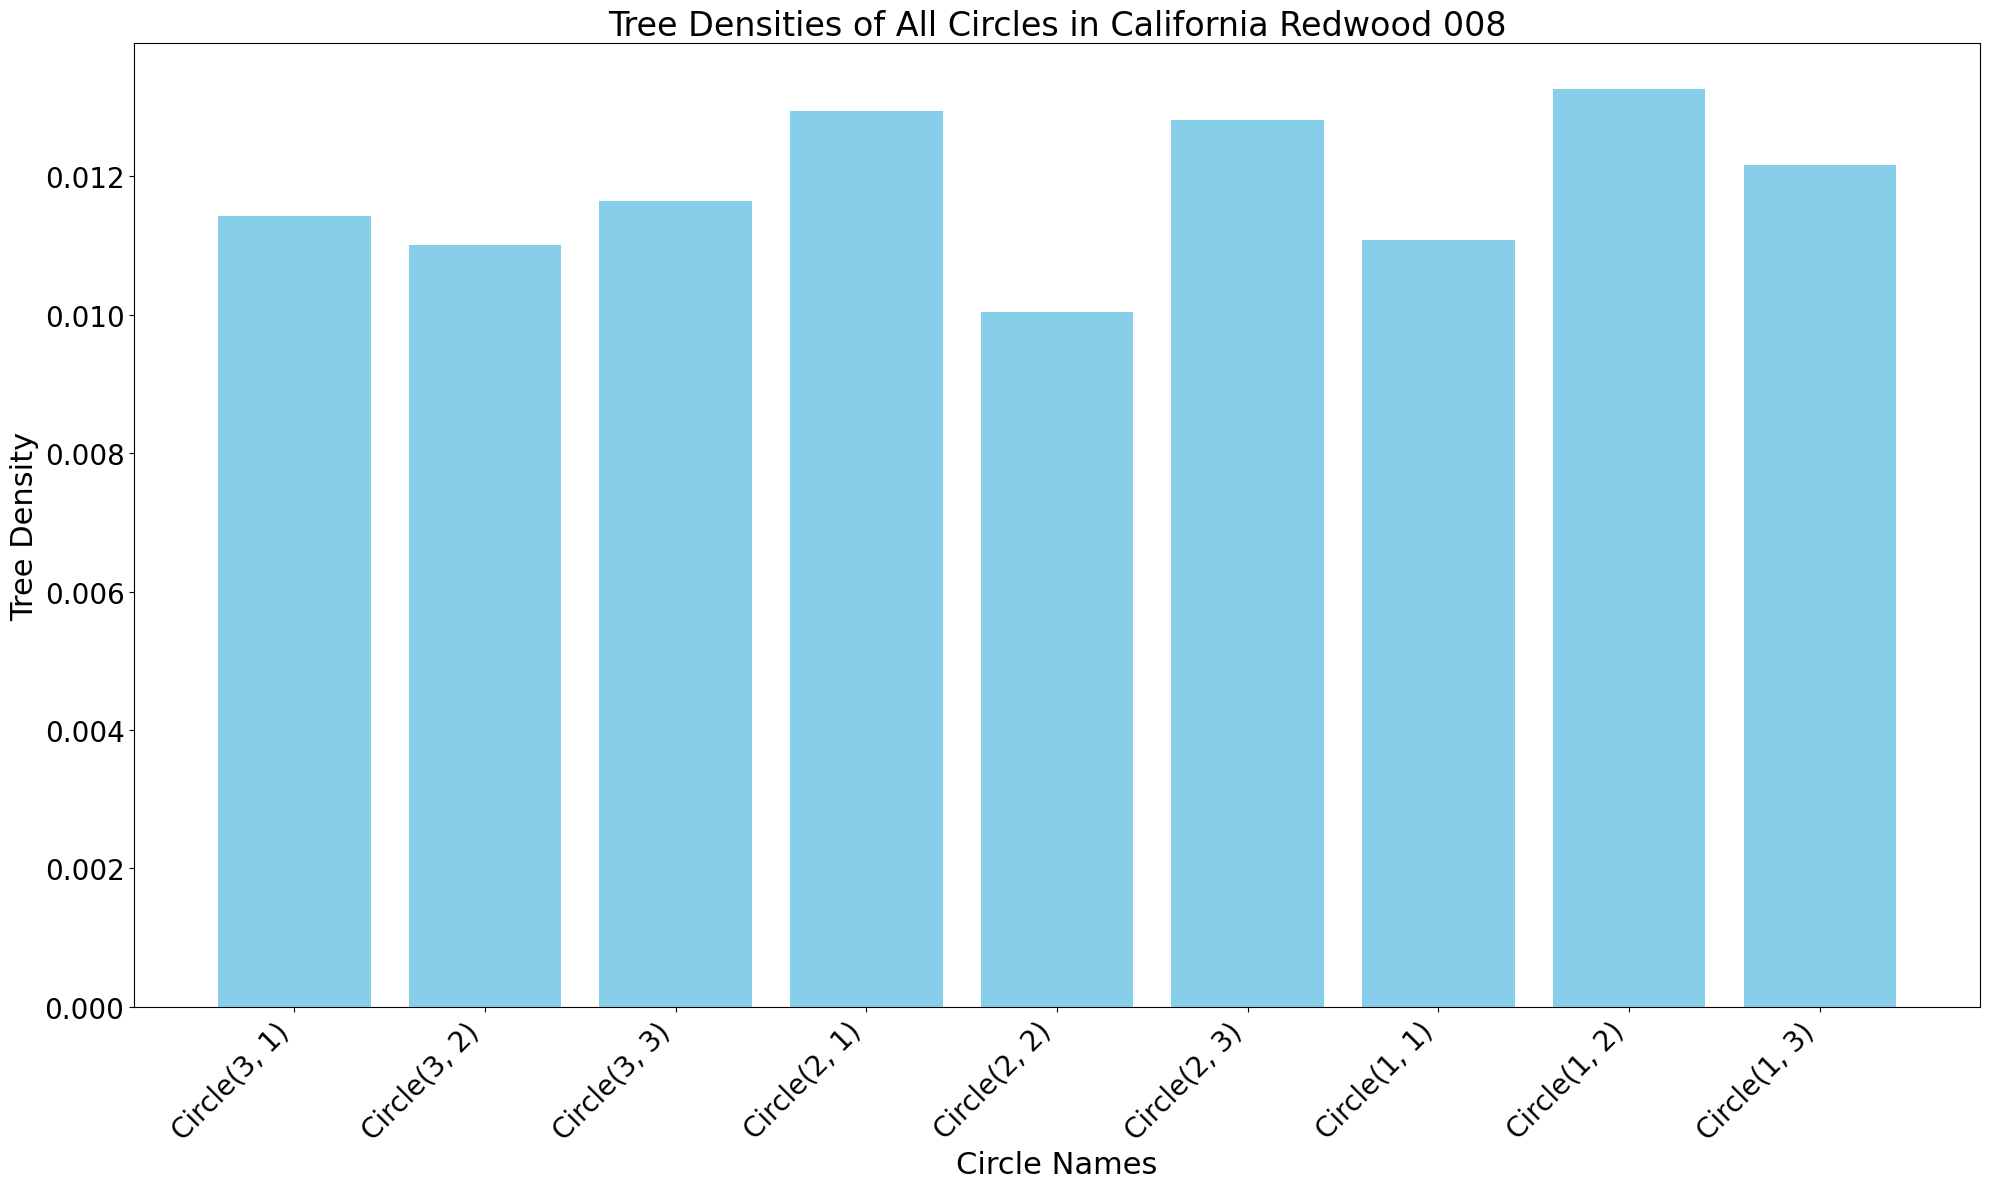

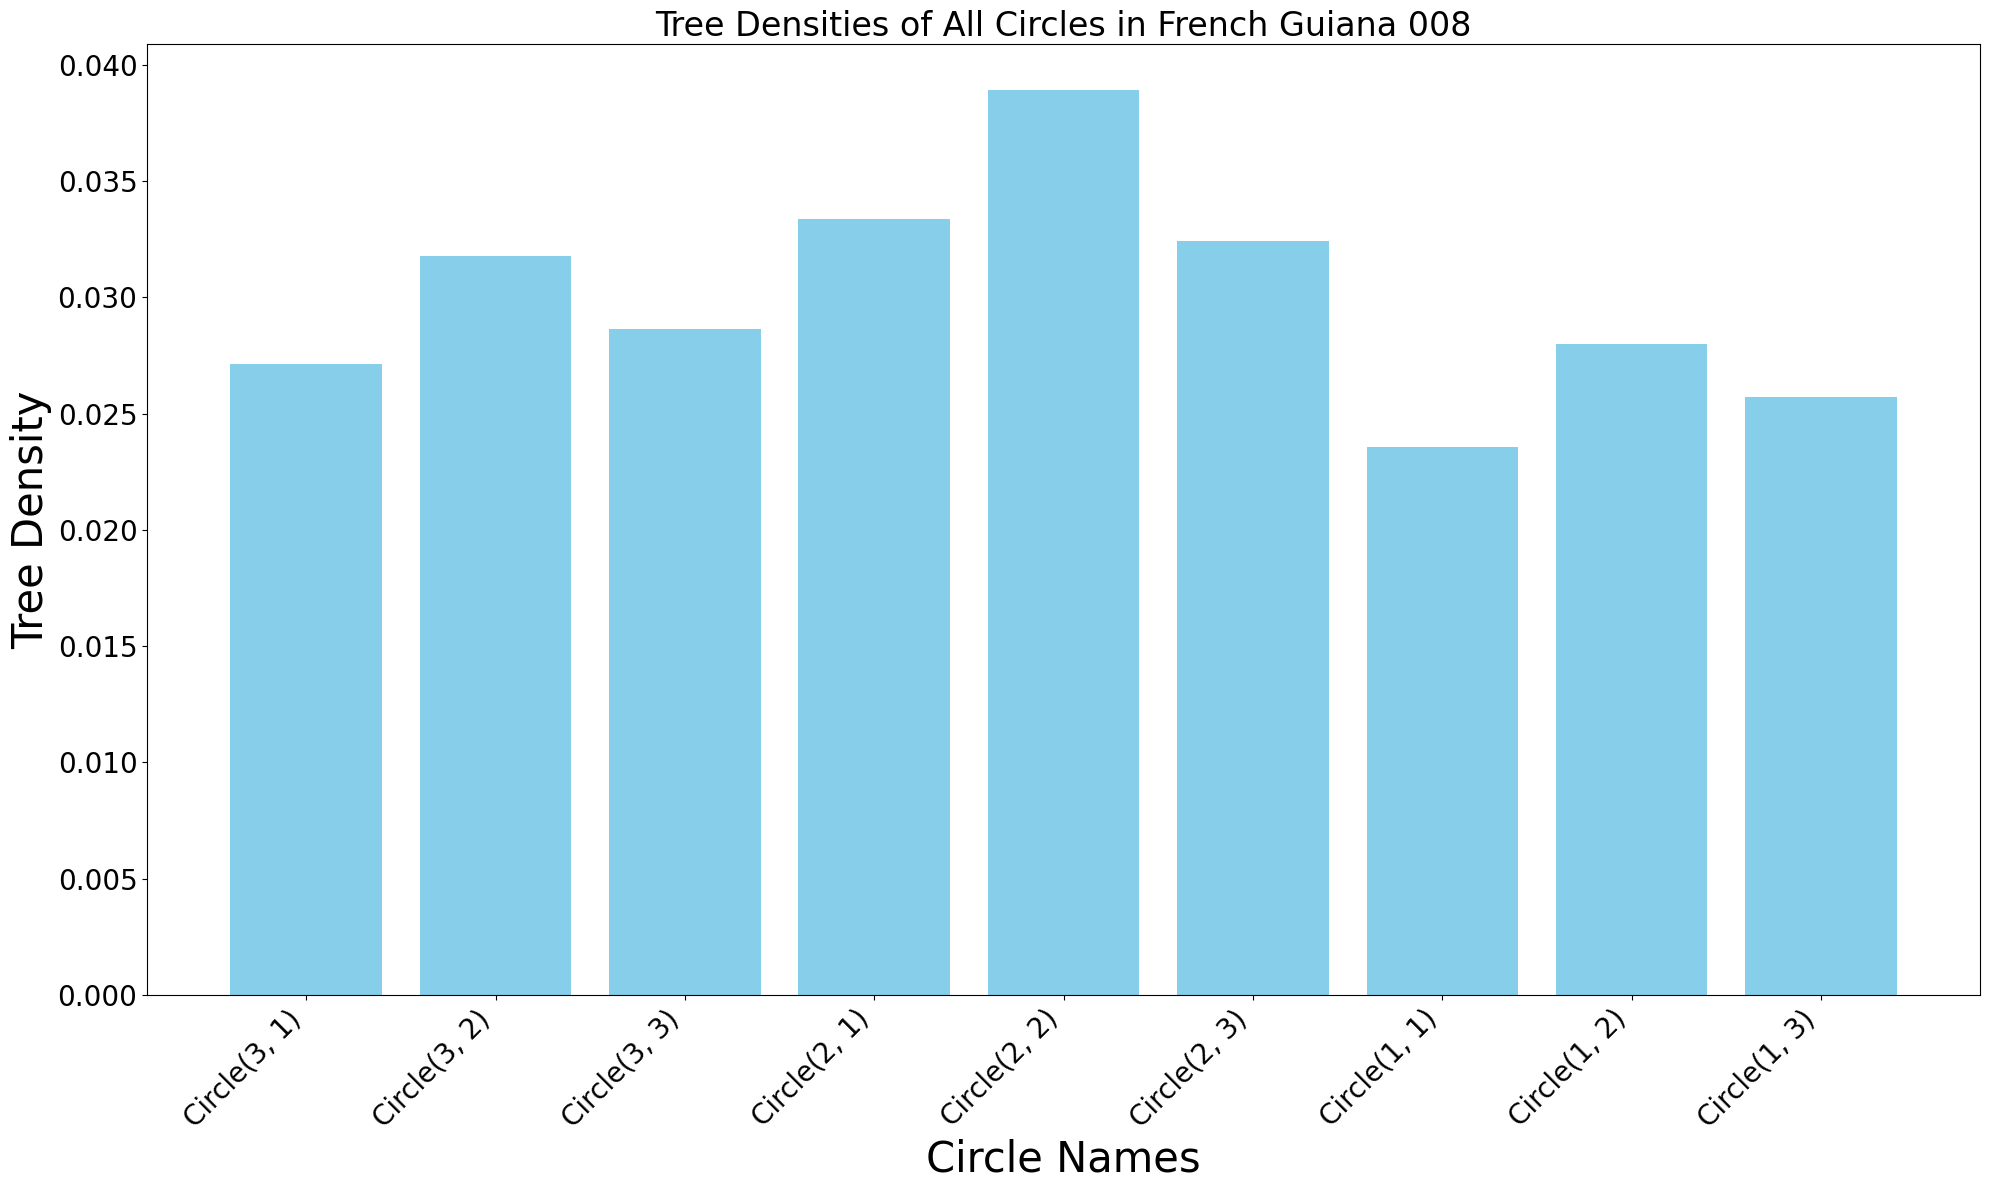

In [17]:
# Define the directory to save the figures
redwood_output_folder = "redwood_output/graphs_and_plots"
guiana_output_folder = "guiana_output/graphs_and_plots"
redwood_output_filename = "redwood_tree_densities.png"
guiana_output_filename = "guiana_tree_densities.png"

redwood_output_file_path = os.path.join(output_path, redwood_output_folder)
guiana_output_file_path = os.path.join(output_path, guiana_output_folder)

plot_tree_densities(redwood_circle_objects, redwood_output_file_path, redwood_output_filename)
plot_tree_densities(guiana_circle_objects, guiana_output_file_path, guiana_output_filename)

In [18]:
def plot_tree_metrics(tree_objects, output_folder, output_filename):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    tree_heights = [tree.tree_height for tree in tree_objects]
    crown_d1_values = [tree.crown_d1 for tree in tree_objects]
    crown_d2_values = [tree.crown_d2 for tree in tree_objects]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(24, 12))

    # Plot crown_d2 vs tree_height
    axs[0].scatter(tree_heights, crown_d2_values, color='blue', alpha=0.5)
    axs[0].set_title('Crown Radius vs Tree Height')
    axs[0].set_xlabel('Tree Height')
    axs[0].set_ylabel('Crown Radius')
    axs[0].grid(True)

    # Plot crown_d1 vs tree_height
    axs[1].scatter(tree_heights, crown_d1_values, color='green', alpha=0.5)
    axs[1].set_title('Crown Depth vs Tree Height')
    axs[1].set_xlabel('Tree Height')
    axs[1].set_ylabel('Crown Depth')
    axs[1].grid(True)

    # Calculate crown_d2/h values
    crown_d2_over_h_values = [d2 / h for d2, h in zip(crown_d2_values, tree_heights)]

    # Plot crown_d2/h vs tree_height
    axs[2].scatter(tree_heights, crown_d2_over_h_values, color='red', alpha=0.5)
    axs[2].set_title('Crown Radius/Tree Height\n vs Tree Height')
    axs[2].set_xlabel('Tree Height')
    axs[2].set_ylabel('Crown Radius / Tree Height')
    axs[2].grid(True)

    # Set the suptitle and adjust layout
    if "redwood" in output_filename:
        plt.suptitle('California Redwood Tree Metrics', x=0.5, y=0.90, fontsize=36) 
    elif "guiana" in output_filename:
        plt.suptitle('French Guiana Tree Metrics', x=0.5, y=0.90, fontsize=36)
        
    plt.subplots_adjust(top=0.80, bottom=0.08, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

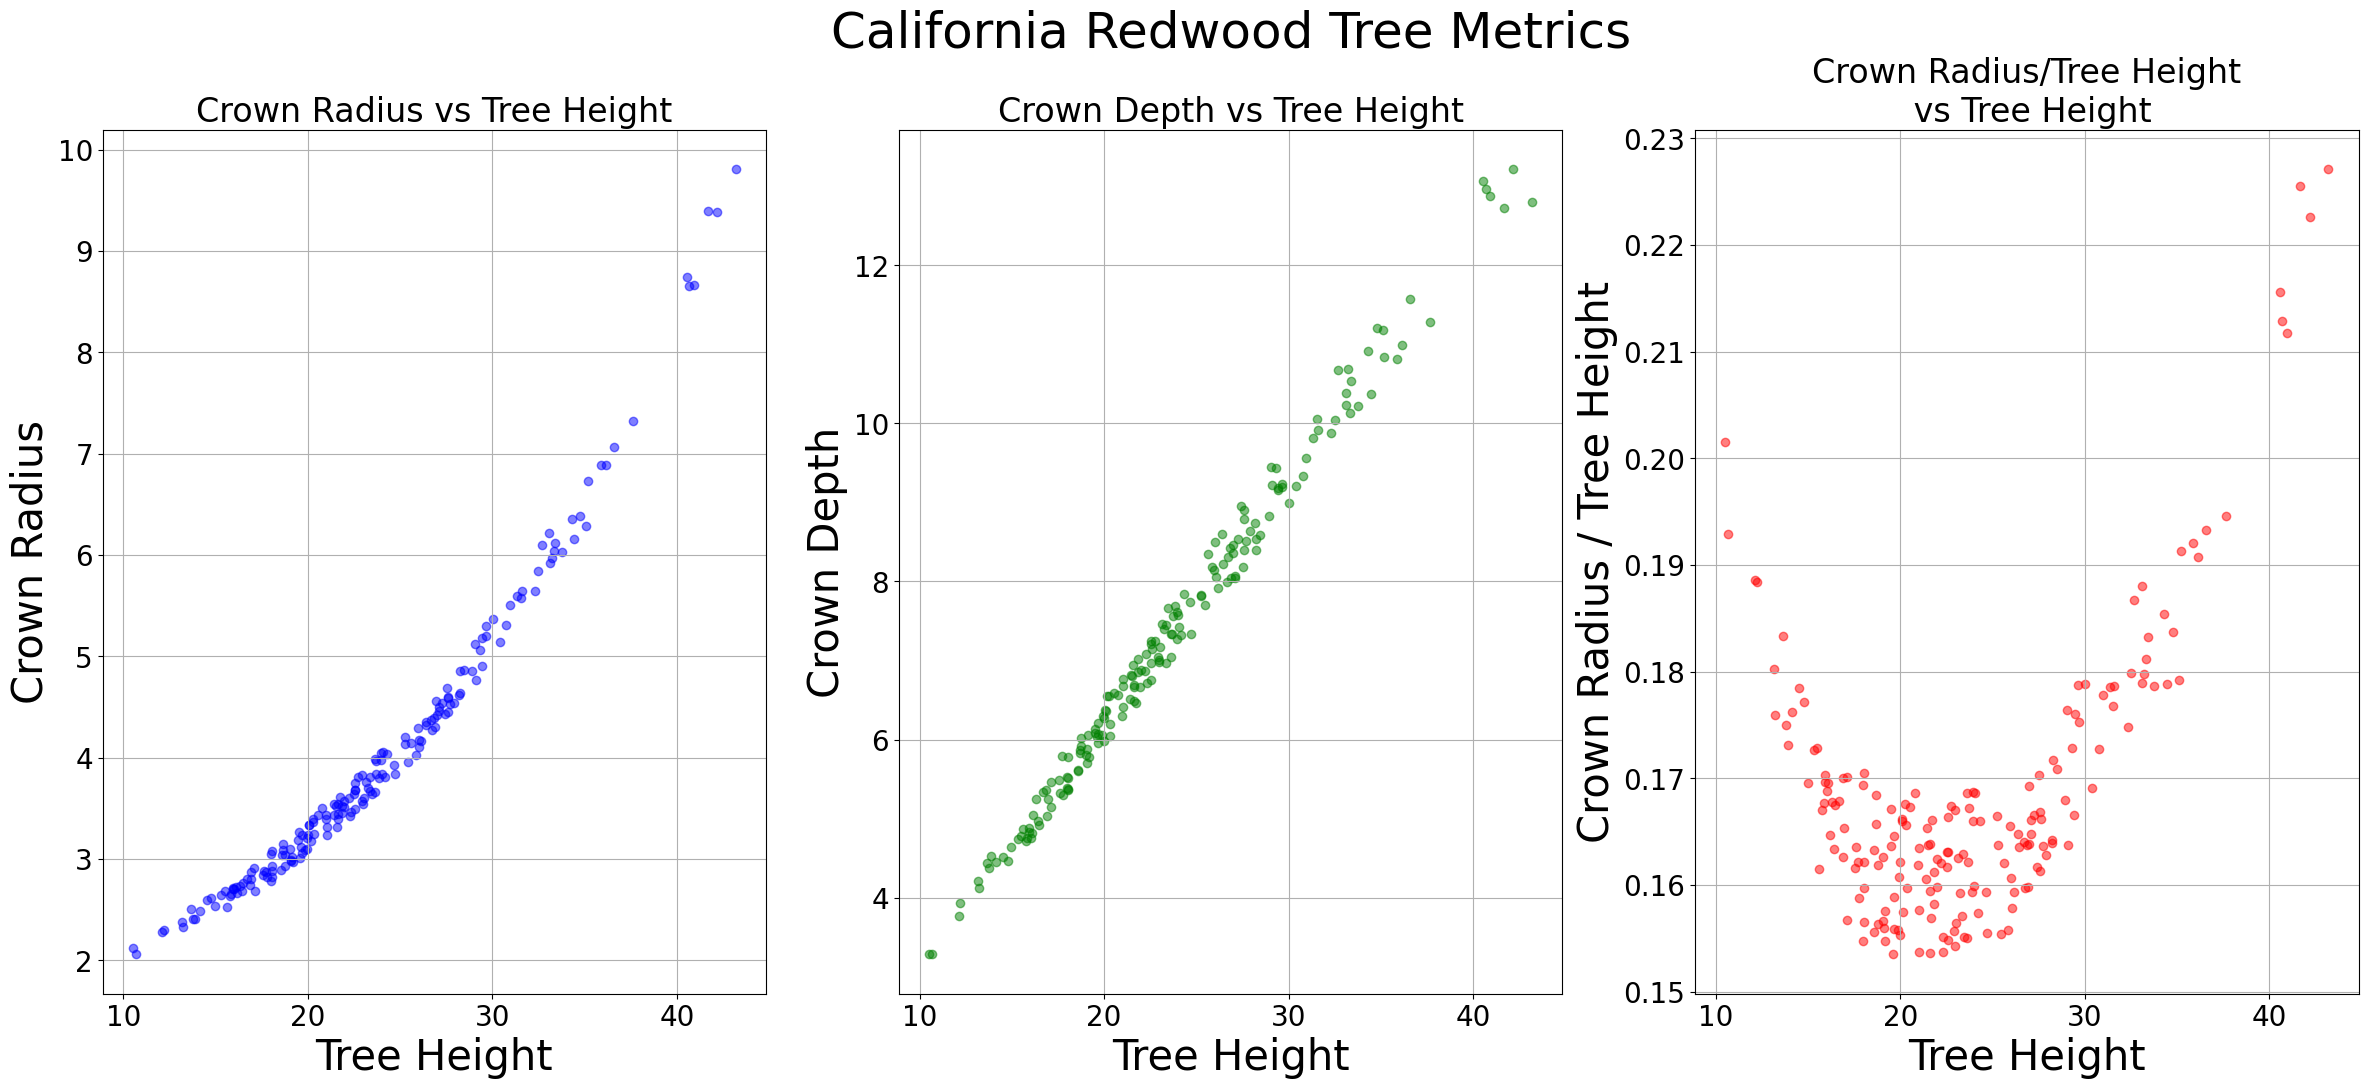

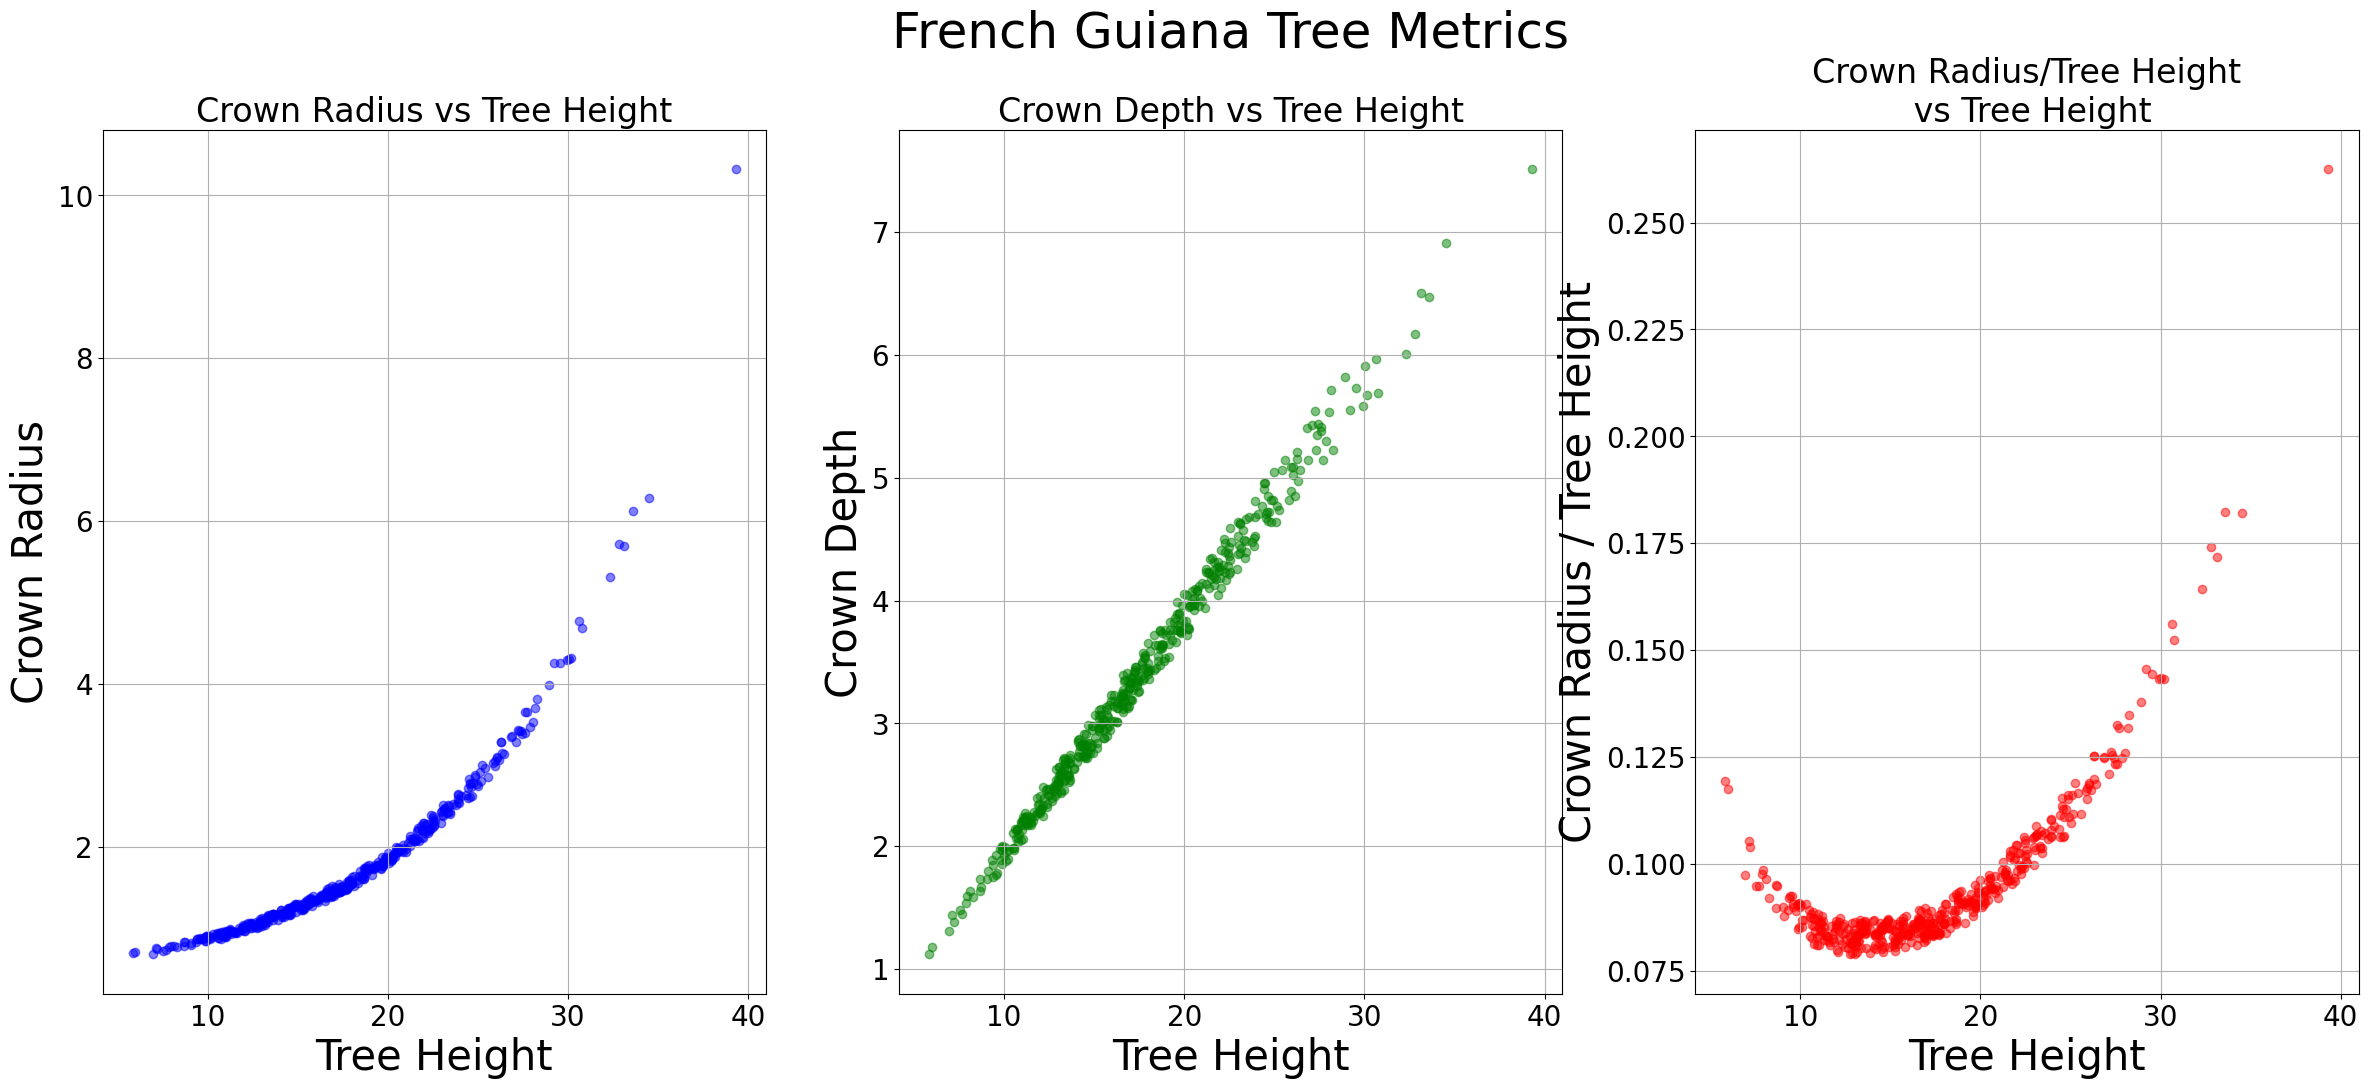

In [19]:
redwood_output_filename = "redwood_tree_metrics.png"
guiana_output_filename = "guiana_tree_metrics.png"

plot_tree_metrics(redwood_tree_objects, redwood_output_file_path, redwood_output_filename)
plot_tree_metrics(guiana_tree_objects, guiana_output_file_path, guiana_output_filename)

In [20]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 15

def plot_crown_radius_count(tree_objects, circle_objects, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    for i, circle in enumerate(circle_objects):
        all_crown_d2_values = [tree_objects[tree_index - 1].crown_d2 for tree_index in circle.tree_indices]
        print(all_crown_d2_values)
        
        # Plot histogram for all crown_d2 values in the current circle
        x_min = min(all_crown_d2_values)
        x_max = max(all_crown_d2_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_crown_d2_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle.circle_name)
        axs_flat[i].set_xlabel('Crown Radius')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Crown Radius Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_tree_height_count(tree_objects, circle_objects, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    for i, circle in enumerate(circle_objects):
        all_tree_height_values = [tree_objects[tree_index - 1].tree_height for tree_index in circle.tree_indices]
        
        # Plot histogram for all tree height values in the current circle
        x_min = min(all_tree_height_values)
        x_max = max(all_tree_height_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_tree_height_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle.circle_name)
        axs_flat[i].set_xlabel('Tree Height')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Tree Height Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_width_tree_height_ratio_count(tree_objects, circle_objects, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    for i, circle in enumerate(circle_objects):
        all_crown_d2_values = np.array([tree_objects[tree_index - 1].crown_d2 for tree_index in circle.tree_indices])
        all_tree_height_values = np.array([tree_objects[tree_index - 1].tree_height for tree_index in circle.tree_indices])
        all_ratio_values = all_crown_d2_values/all_tree_height_values
        
        # Plot histogram for all crown_d2 values in the current circle
        x_min = min(all_ratio_values)
        x_max = max(all_ratio_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_ratio_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle.circle_name)
        axs_flat[i].set_xlabel('Crown Width to Tree Height Ratio')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Crown Width to Tree Height Ratio Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_depth_tree_height_ratio_count(tree_objects, output_folder, output_filename, plot_title):

    all_crown_d1_values = np.array([tree.crown_d1 for tree in tree_objects])
    tree_height = np.array([tree.tree_height for tree in tree_objects])
    crown_d1_tree_height_ratios = all_crown_d1_values/tree_height

    # Plot histogram
    plt.figure(figsize=(20, 20))
    x_min = min(crown_d1_tree_height_ratios)
    x_max = max(crown_d1_tree_height_ratios)
    x_range = x_max - x_min
    bar_width = x_range / 28  # Adjust divisor as needed
    plt.hist(crown_d1_tree_height_ratios, bins=20, color='blue', alpha=0.7, width=bar_width)

    plt.title(f'{plot_title}  \nCrown Depth to Tree Height Ratio Count')
    plt.xlabel('Crown Depth / Tree Height')
    plt.ylabel('Count')

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_depth_crown_width_ratio_count(tree_objects, output_folder, output_filename, plot_title):
    
    all_crown_d1_values = np.array([tree.crown_d1 for tree in tree_objects])
    all_crown_d2_values = np.array([tree.crown_d2 for tree in tree_objects])
    crown_d1_crown_width_ratios = all_crown_d1_values/all_crown_d2_values

    # Plot histogram
    plt.figure(figsize=(18, 12))
    x_min = min(crown_d1_crown_width_ratios)
    x_max = max(crown_d1_crown_width_ratios)
    x_range = x_max - x_min
    bar_width = x_range / 28  # Adjust divisor as needed
    plt.hist(crown_d1_crown_width_ratios, bins=20, color='blue', alpha=0.7, width=bar_width)

    plt.title(f'{plot_title}  \nCrown Depth to Crown Width Ratio Count')
    plt.xlabel('Crown Depth / Crown Width')
    plt.ylabel('Count')

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

[4.29379, 4.1094, 3.01703, 3.96548, 3.97536, 3.12049, 9.39988, 3.80068, 5.12178, 3.50254, 5.06283, 9.39113, 3.75779, 3.95389, 3.98385]
[3.07494, 3.24118, 2.72788, 3.54014, 5.64965, 2.50126, 3.31674, 3.3307, 2.05709, 3.67665, 2.65539, 2.32542, 5.92439, 3.70153, 5.14001, 4.60255, 4.27059]
[4.56367, 5.14001, 2.70315, 3.84157, 4.27059, 4.68882, 3.45387, 4.62327, 4.49861, 4.16723, 4.20349, 4.9019, 2.87139, 5.64471, 2.87458]
[6.1011, 9.39988, 3.83872, 5.06283, 3.60014, 2.66158, 6.38919, 2.52232, 3.75281, 2.96908, 2.83805, 2.97728, 5.31218, 3.43639, 2.37348, 2.63356]
[2.90971, 2.49052, 3.50992, 2.32542, 2.78305, 3.39421, 4.60255, 3.54278, 6.7304, 2.92645, 3.5679, 3.36074, 4.8521, 3.44563, 5.18259]
[3.54278, 6.7304, 3.39394, 4.03486, 4.8521, 4.20349, 2.87139, 5.18259, 2.98704, 3.31271, 2.73387, 2.93392, 3.52025, 2.8004, 4.29909, 2.80181, 3.54104, 5.5763]
[3.24871, 3.26187, 2.96908, 2.82372, 2.76075, 2.37348, 2.68185, 3.09308, 2.5904, 6.2903, 3.66649, 3.39515, 4.04184, 3.10119, 2.88029, 6.15716

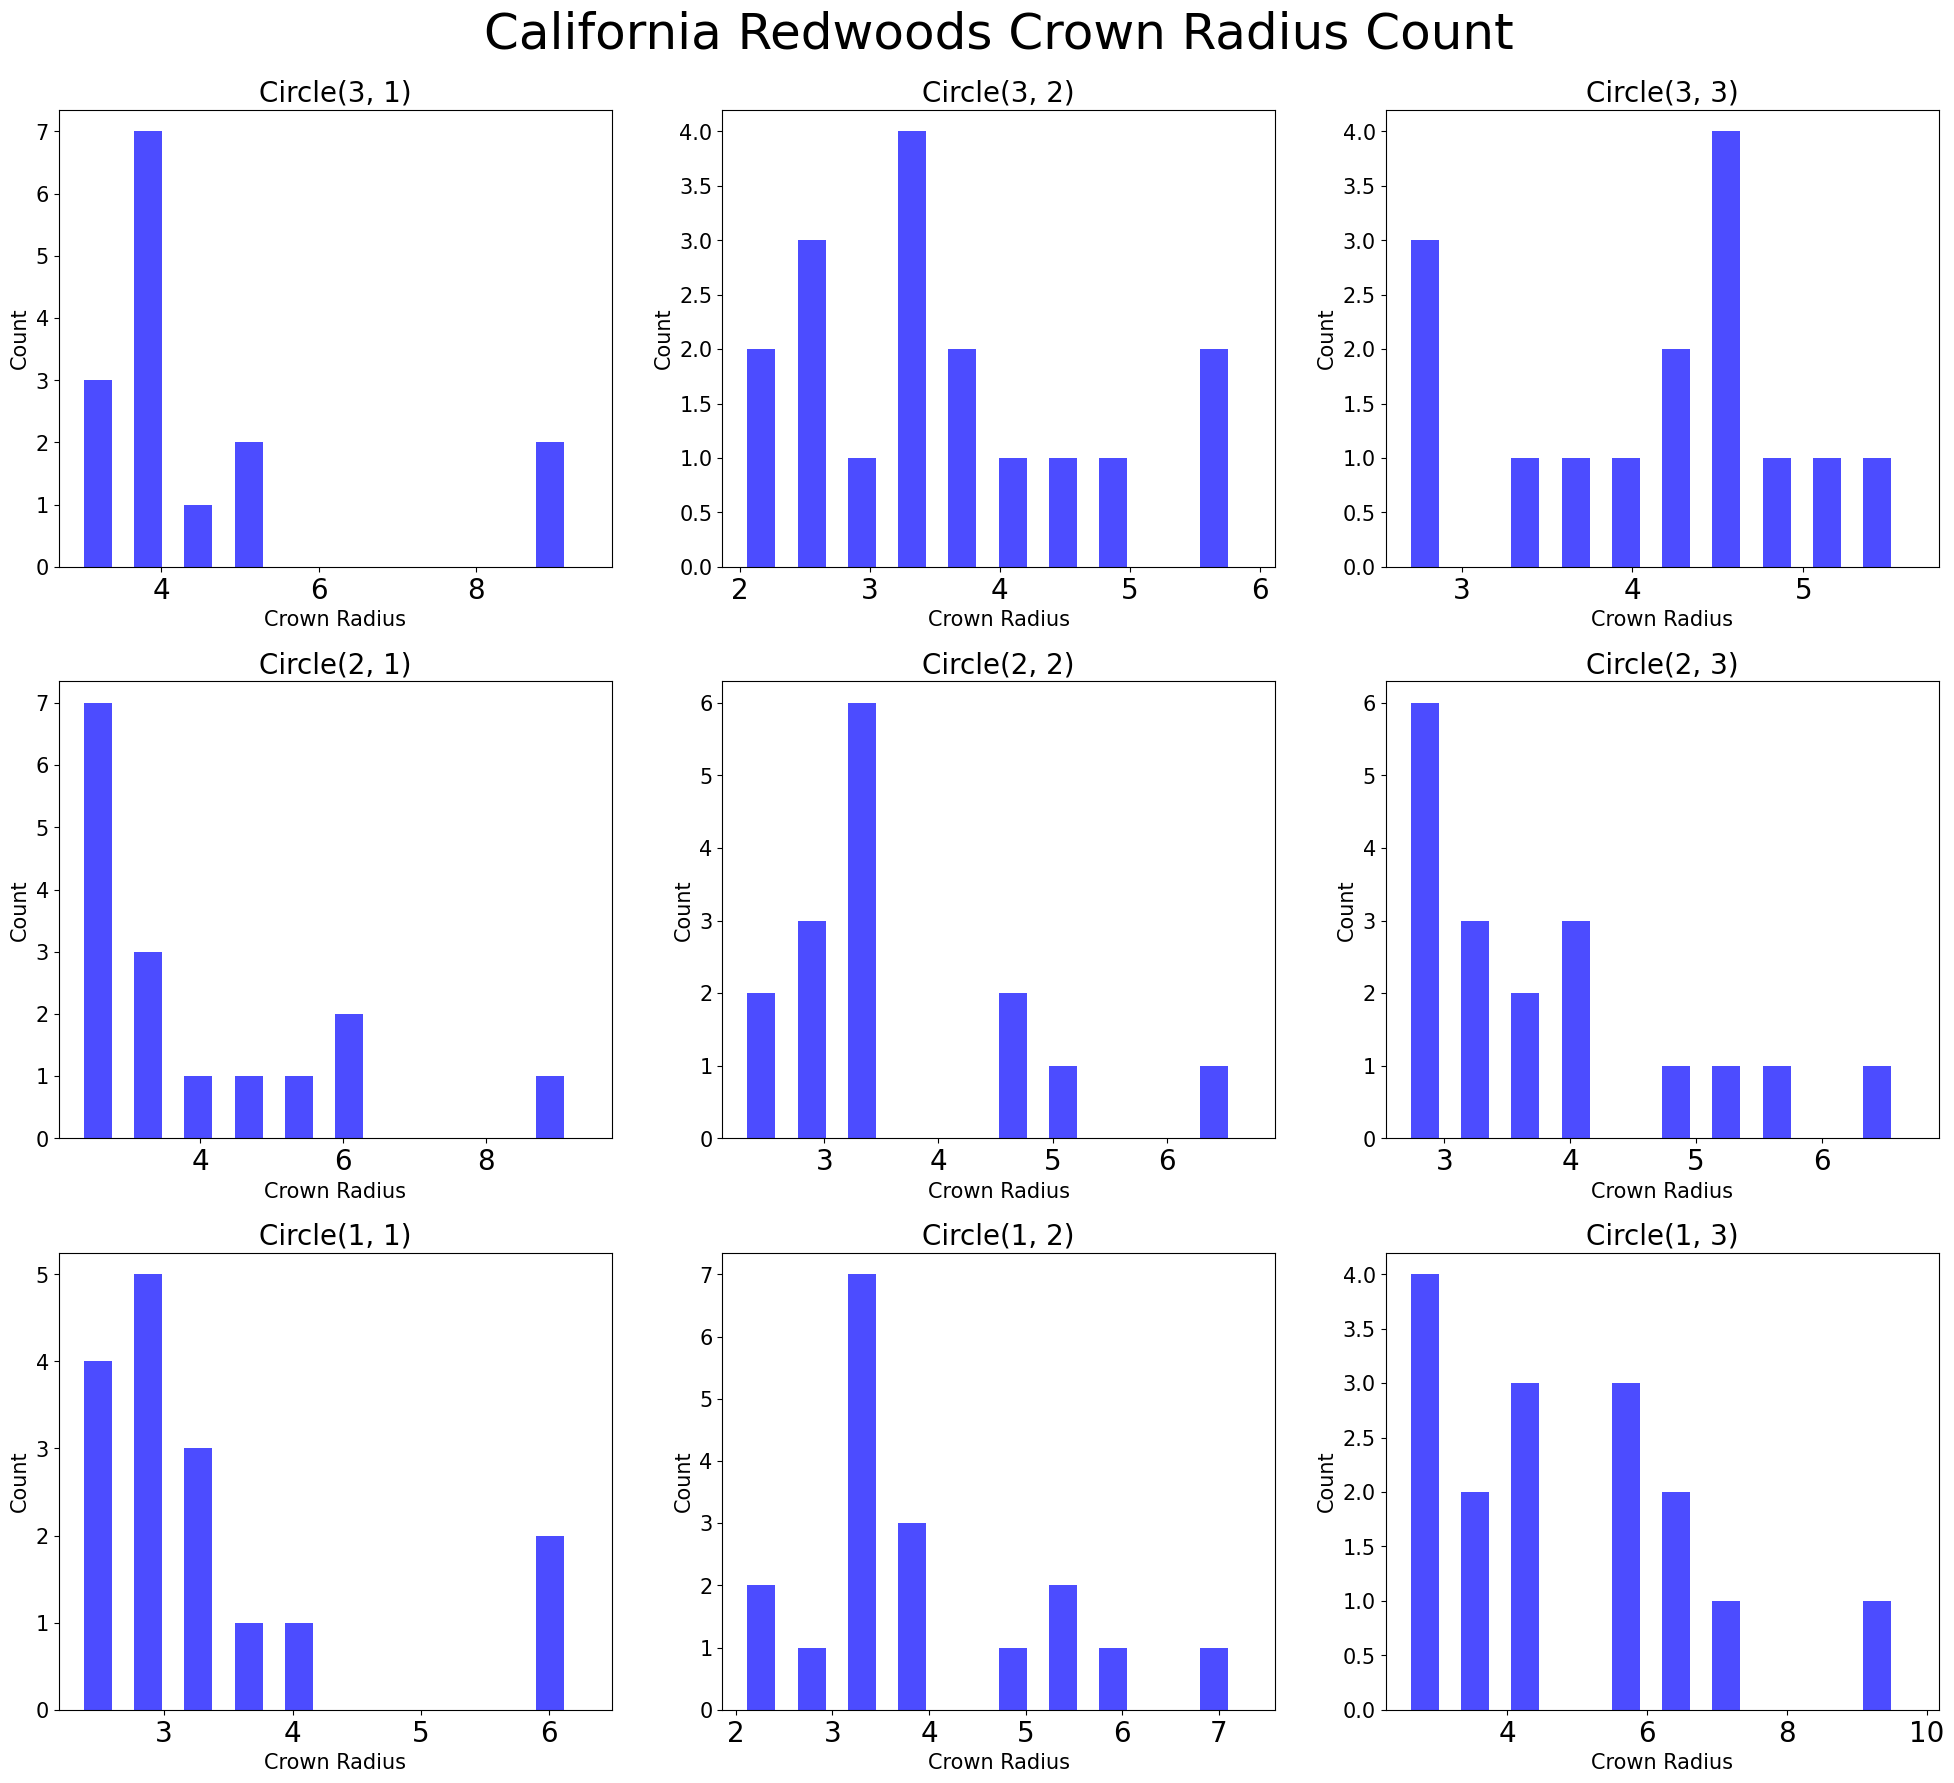

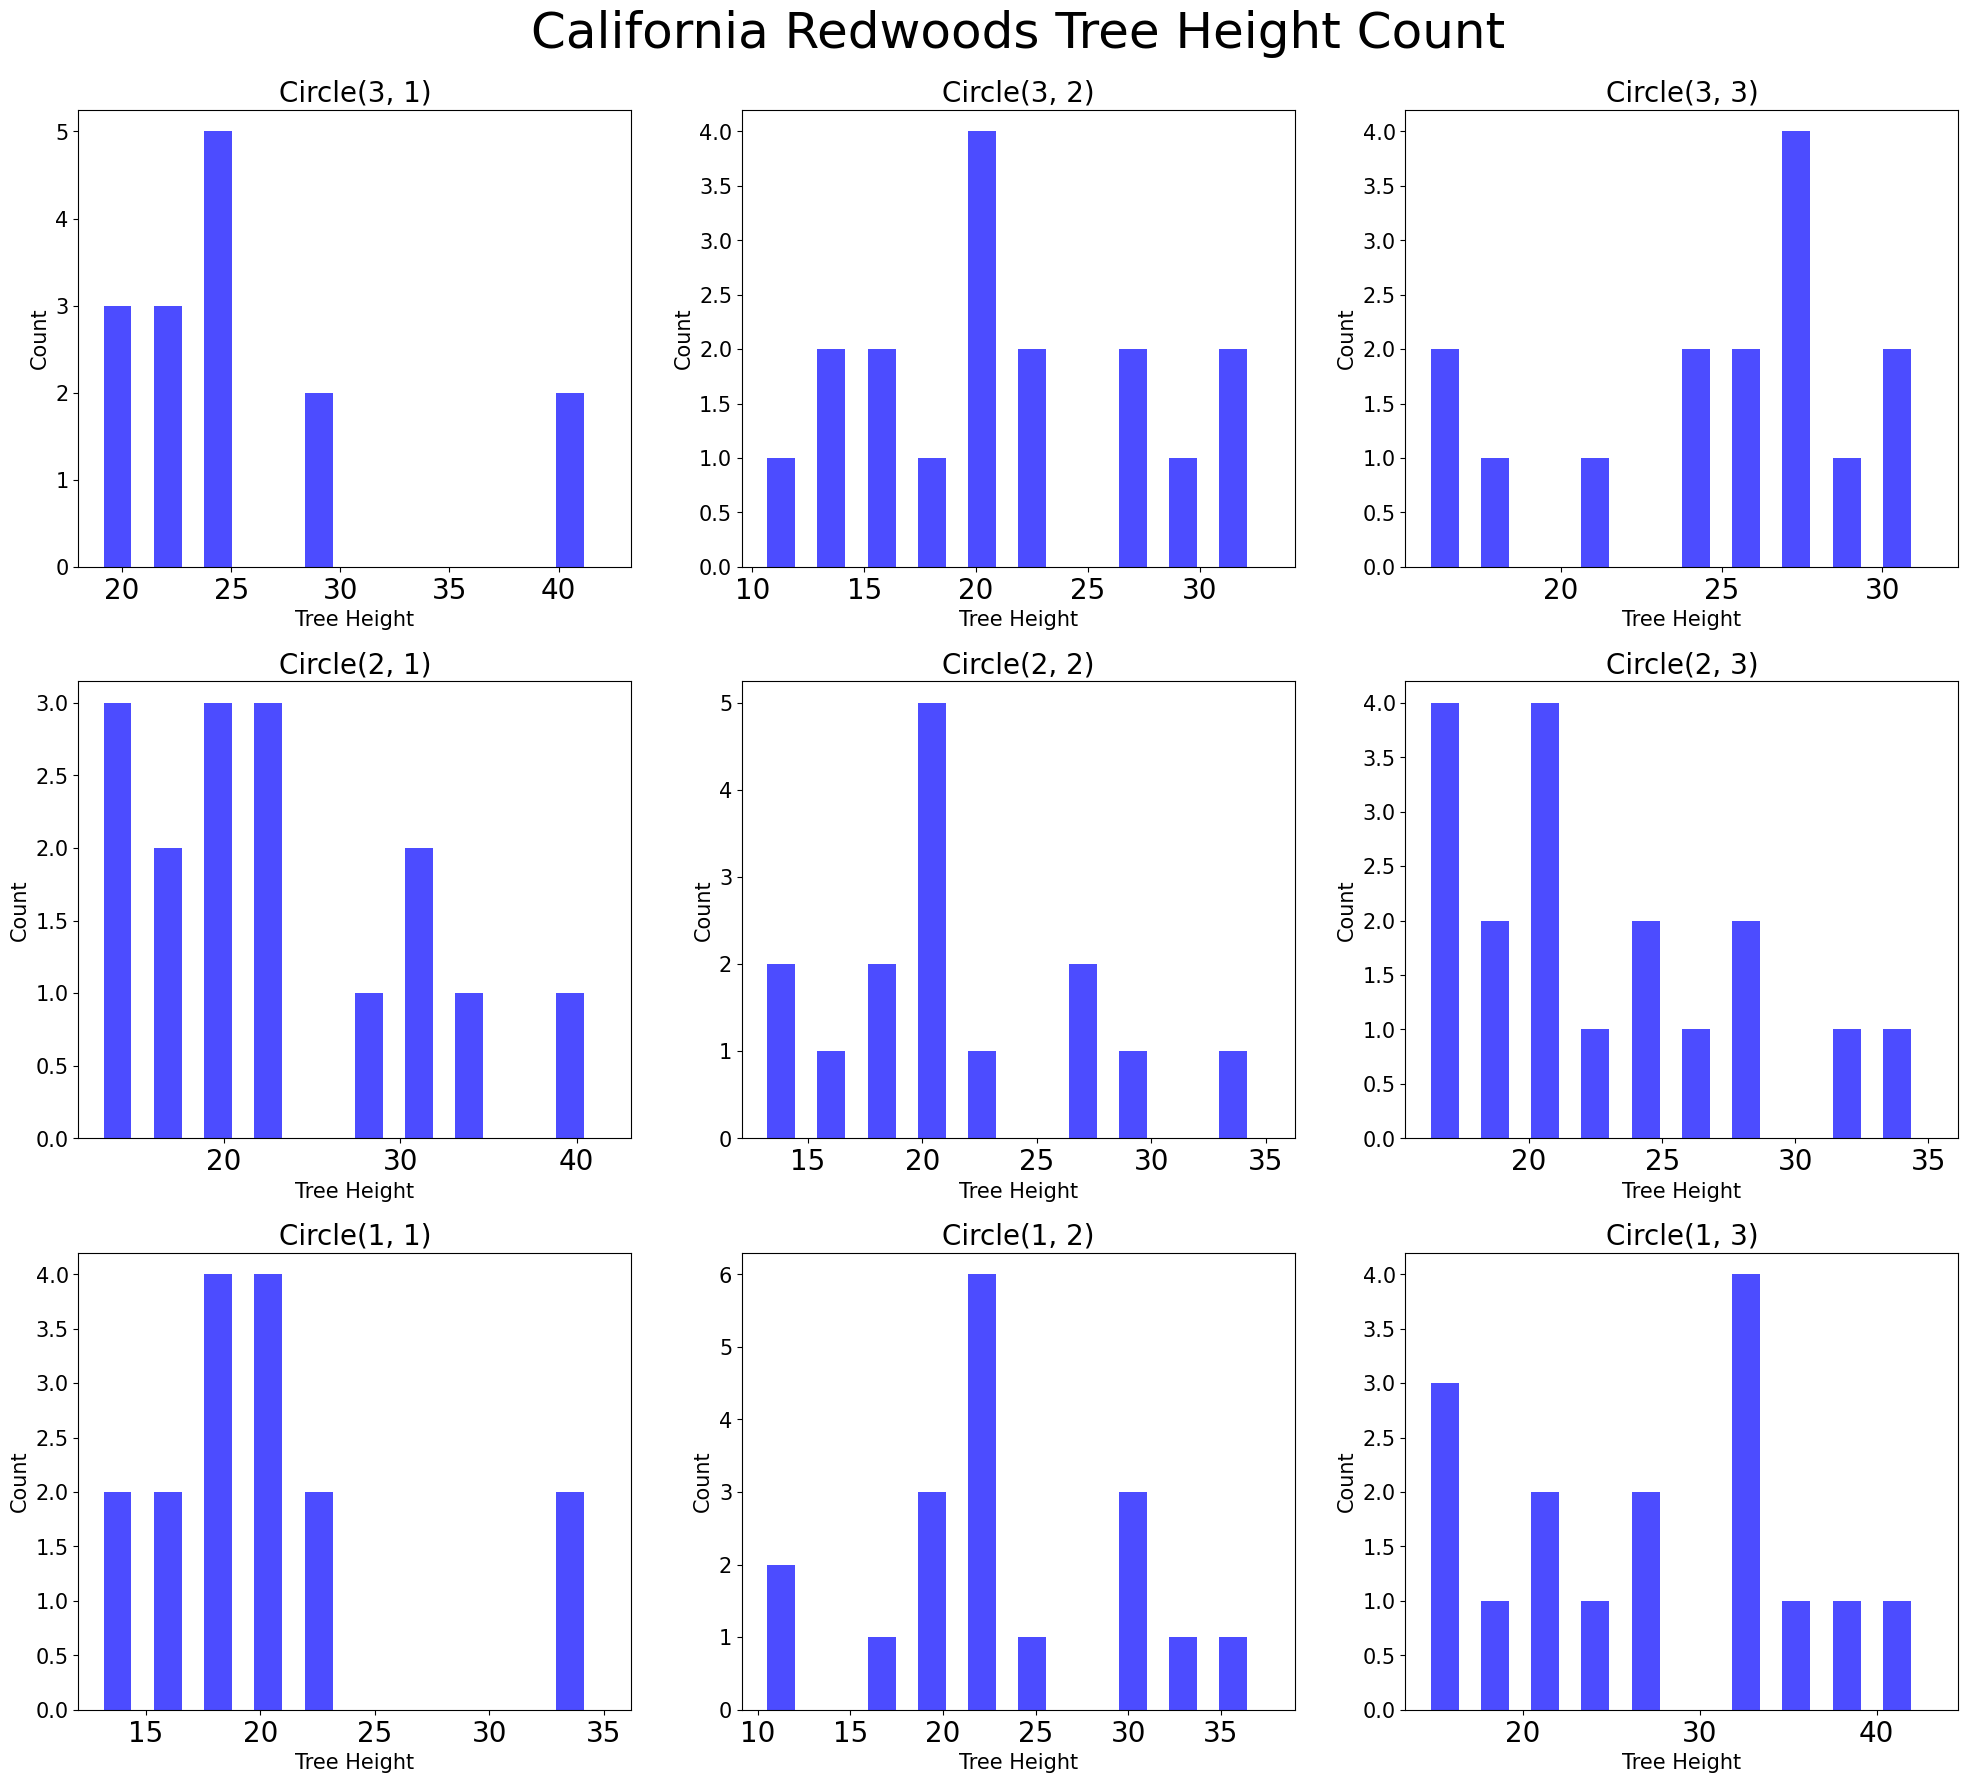

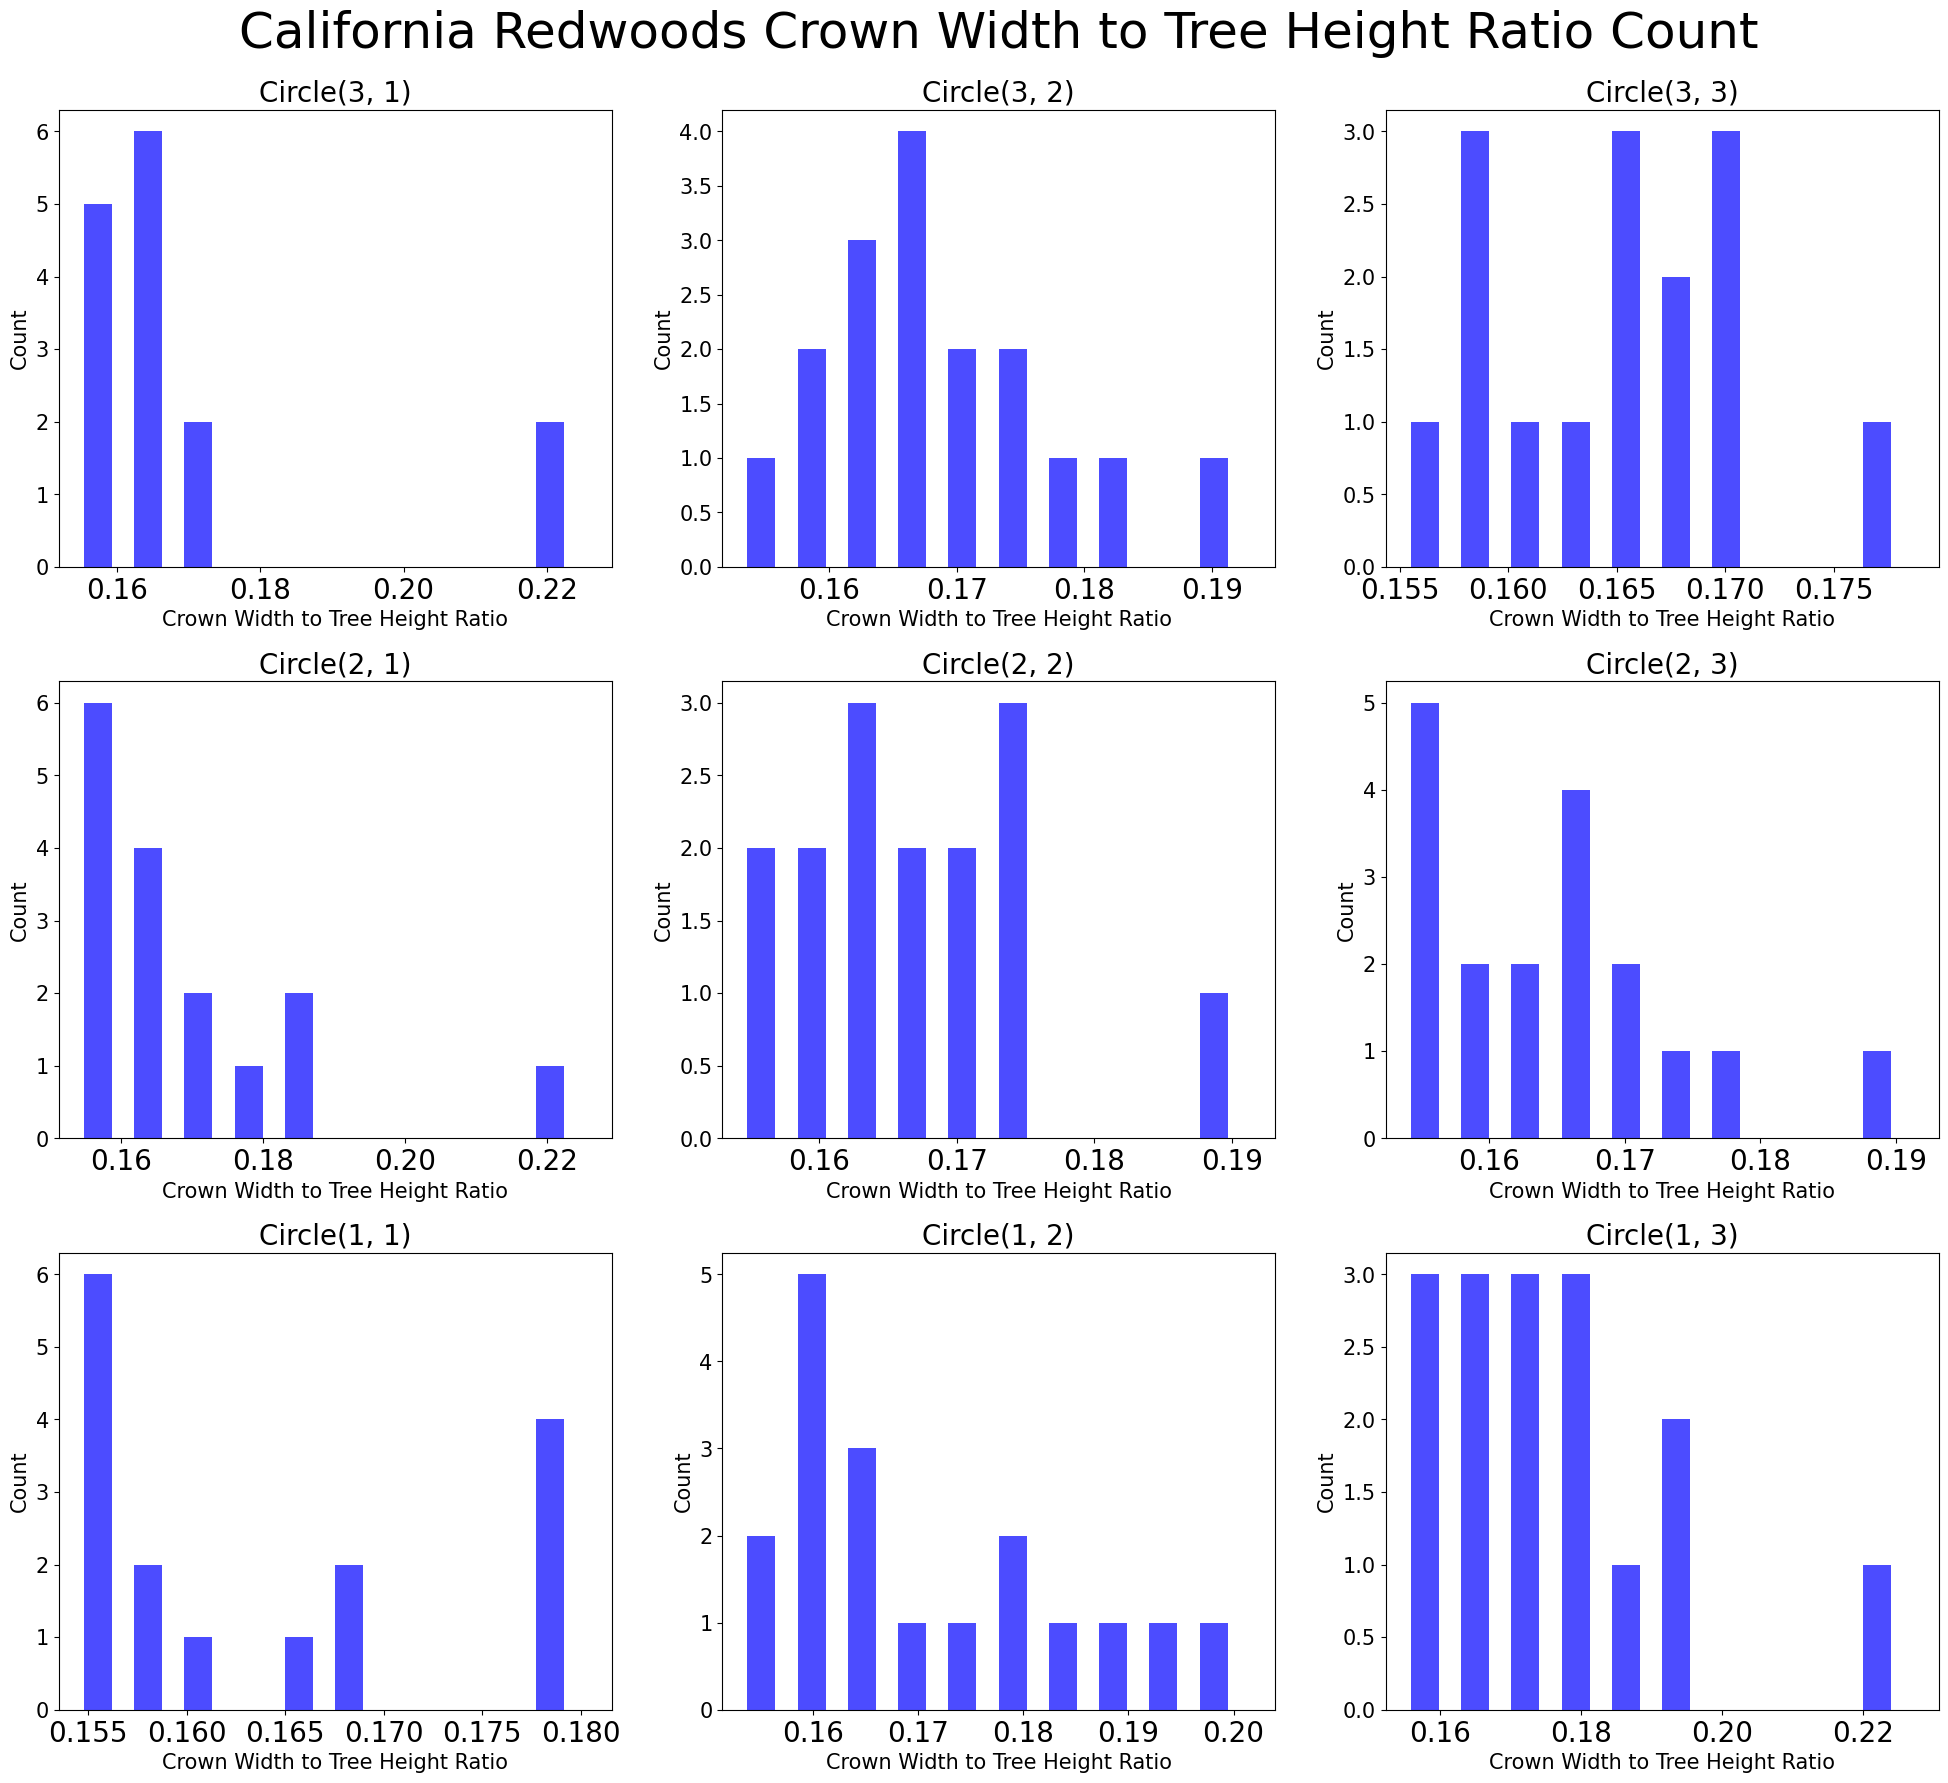

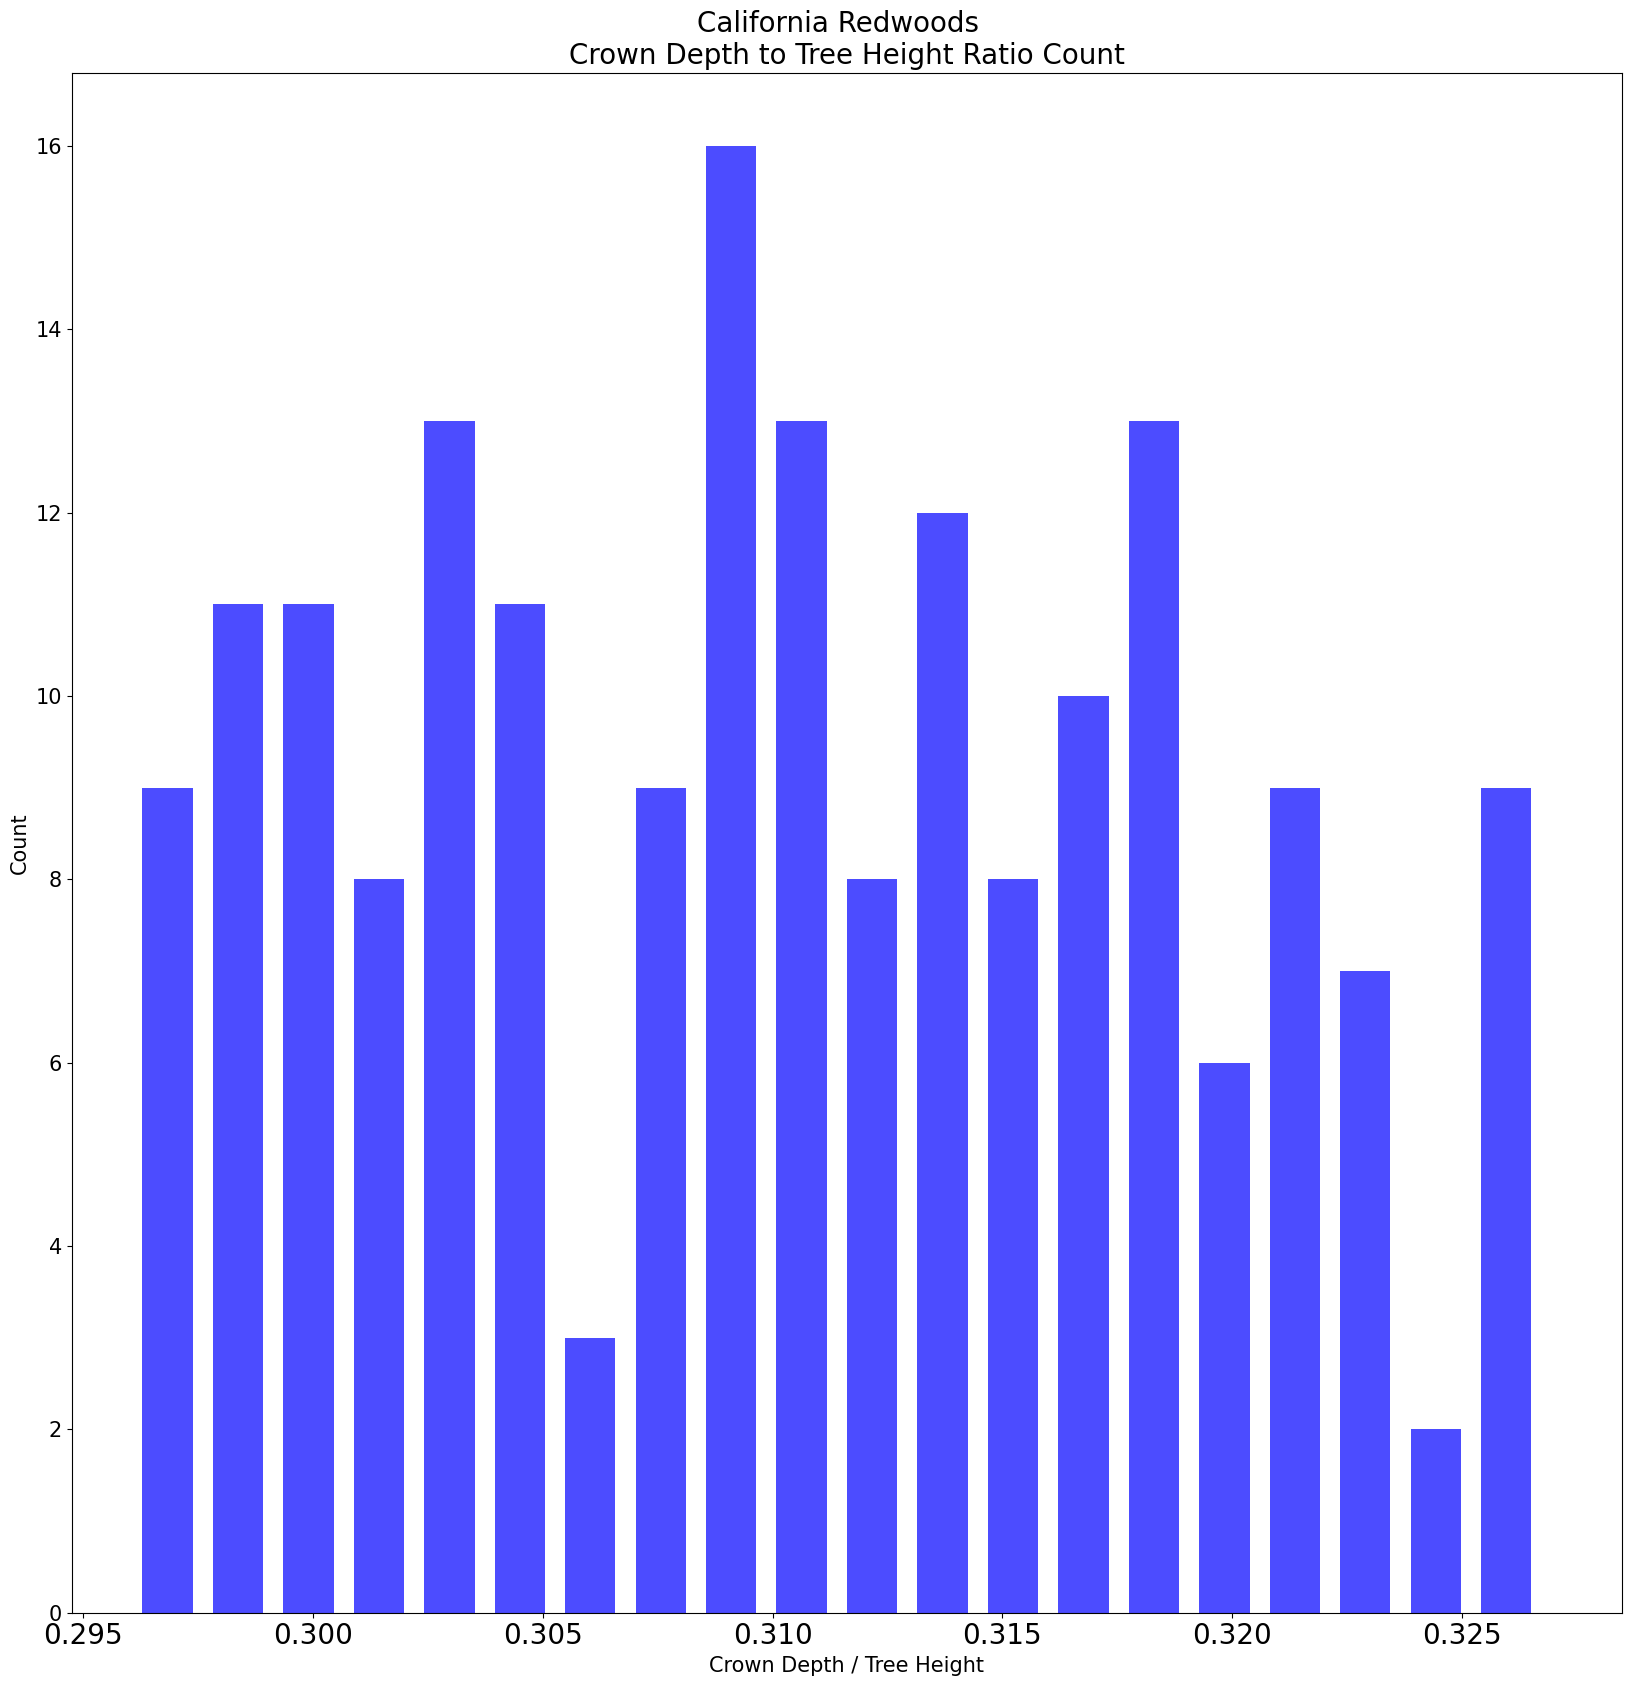

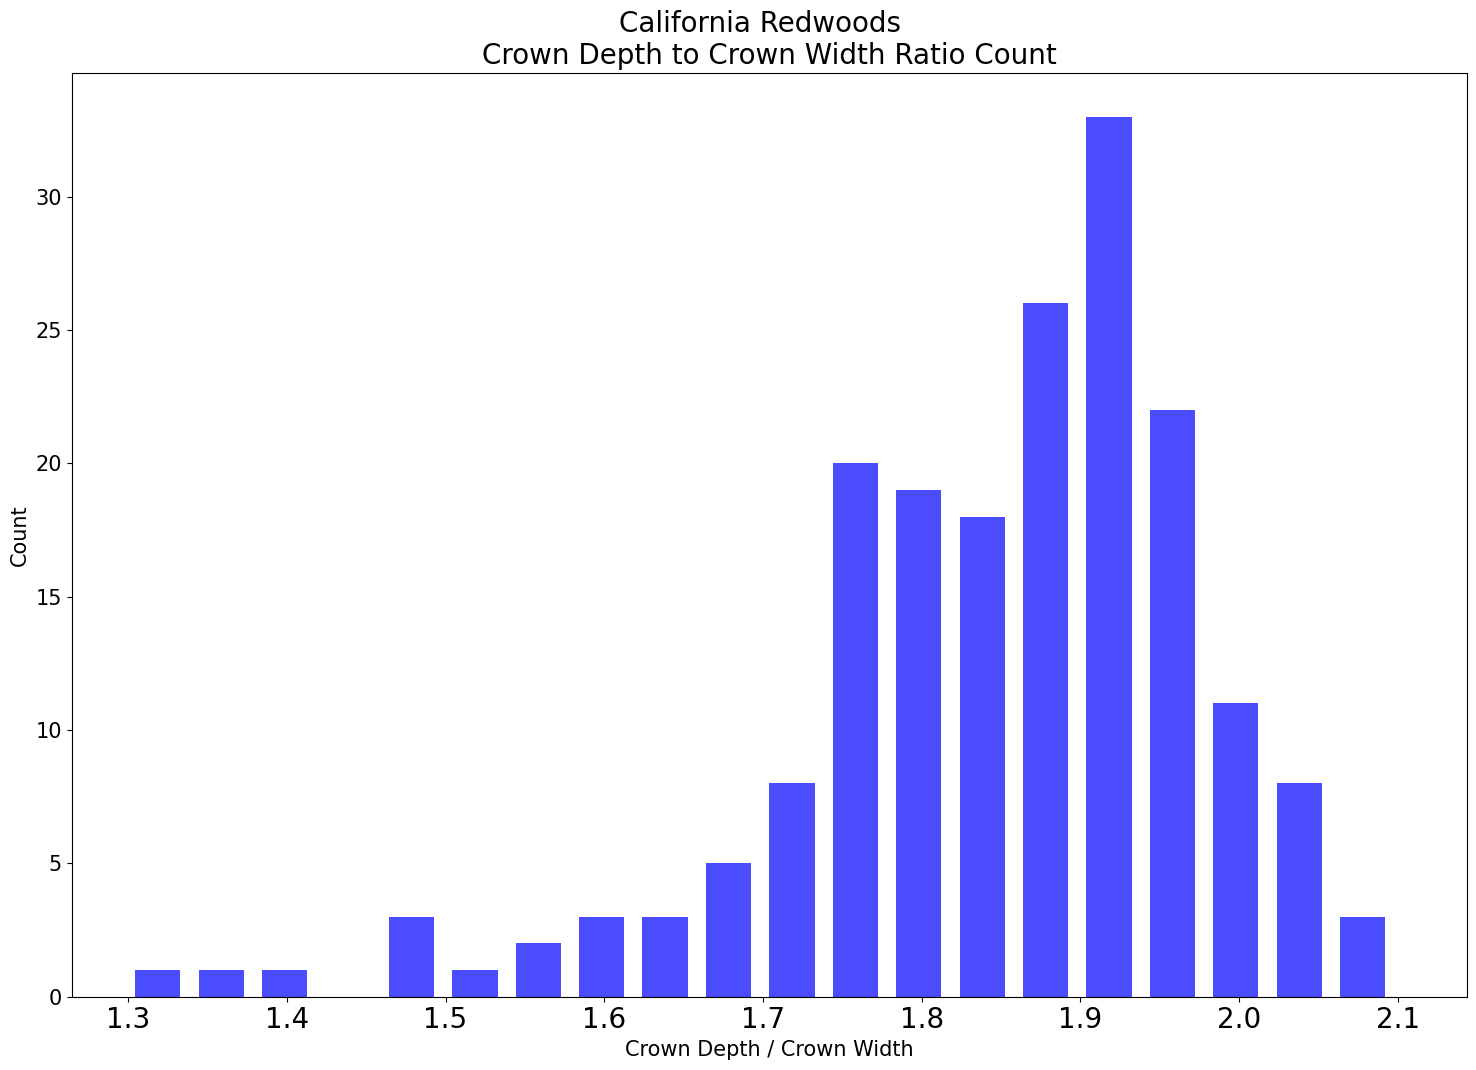

In [21]:
plot_crown_radius_count(redwood_tree_objects, redwood_circle_objects, redwood_output_file_path, "redwood_crown_radius_count.png", "California Redwoods")
plot_tree_height_count(redwood_tree_objects, redwood_circle_objects, redwood_output_file_path, "redwood_tree_height_count.png", "California Redwoods")
plot_crown_width_tree_height_ratio_count(redwood_tree_objects, redwood_circle_objects, redwood_output_file_path, "redwood_cr_width_tree_h_ratio_count.png", "California Redwoods")
plot_crown_depth_tree_height_ratio_count(redwood_tree_objects, redwood_output_file_path, "redwood_cr_depth_tree_h_ratio_count.png", "California Redwoods")
plot_crown_depth_crown_width_ratio_count(redwood_tree_objects, redwood_output_file_path, "redwood_cr_depth_cr_width_ratio_metrics.png", "California Redwoods")

[1.54776, 2.32535, 2.07372, 1.29036, 1.47105, 1.27317, 1.76803, 0.936482, 1.07256, 4.28936, 1.51372, 1.60428, 1.01631, 1.39002, 1.39882, 3.09816, 1.8545, 3.81036, 2.04892, 2.21141, 1.72117, 1.89876, 1.32272, 1.55756, 2.09393, 1.48247, 0.958854, 1.48543, 2.26006]
[3.40086, 2.43086, 1.32462, 0.963744, 1.51372, 2.11383, 4.68814, 1.72044, 0.862048, 2.00919, 1.6533, 2.08781, 0.915033, 2.50994, 1.06754, 1.78971, 1.40284, 1.50973, 3.98726, 2.62765, 1.63673, 1.27393, 0.871018, 1.15749, 1.42759, 4.31867, 2.63628, 1.92835, 1.62439, 1.10978, 0.896218, 1.04249, 1.49464, 4.30837]
[1.27508, 1.72119, 1.43666, 2.82719, 1.52206, 1.80309, 0.844024, 1.77154, 1.25415, 3.29099, 1.80137, 3.38305, 1.05003, 1.08263, 1.54601, 3.41858, 1.14349, 2.51432, 0.953822, 1.09659, 1.04758, 2.46543, 1.88445, 0.870253, 1.4554, 1.16962, 2.38534, 0.783303, 2.29617]
[1.19346, 1.21585, 1.86686, 1.26109, 2.64196, 0.953338, 1.33272, 2.06325, 1.95062, 1.03396, 2.20779, 1.4406, 2.06915, 1.42482, 1.93887, 0.905727, 1.04748, 1.7211

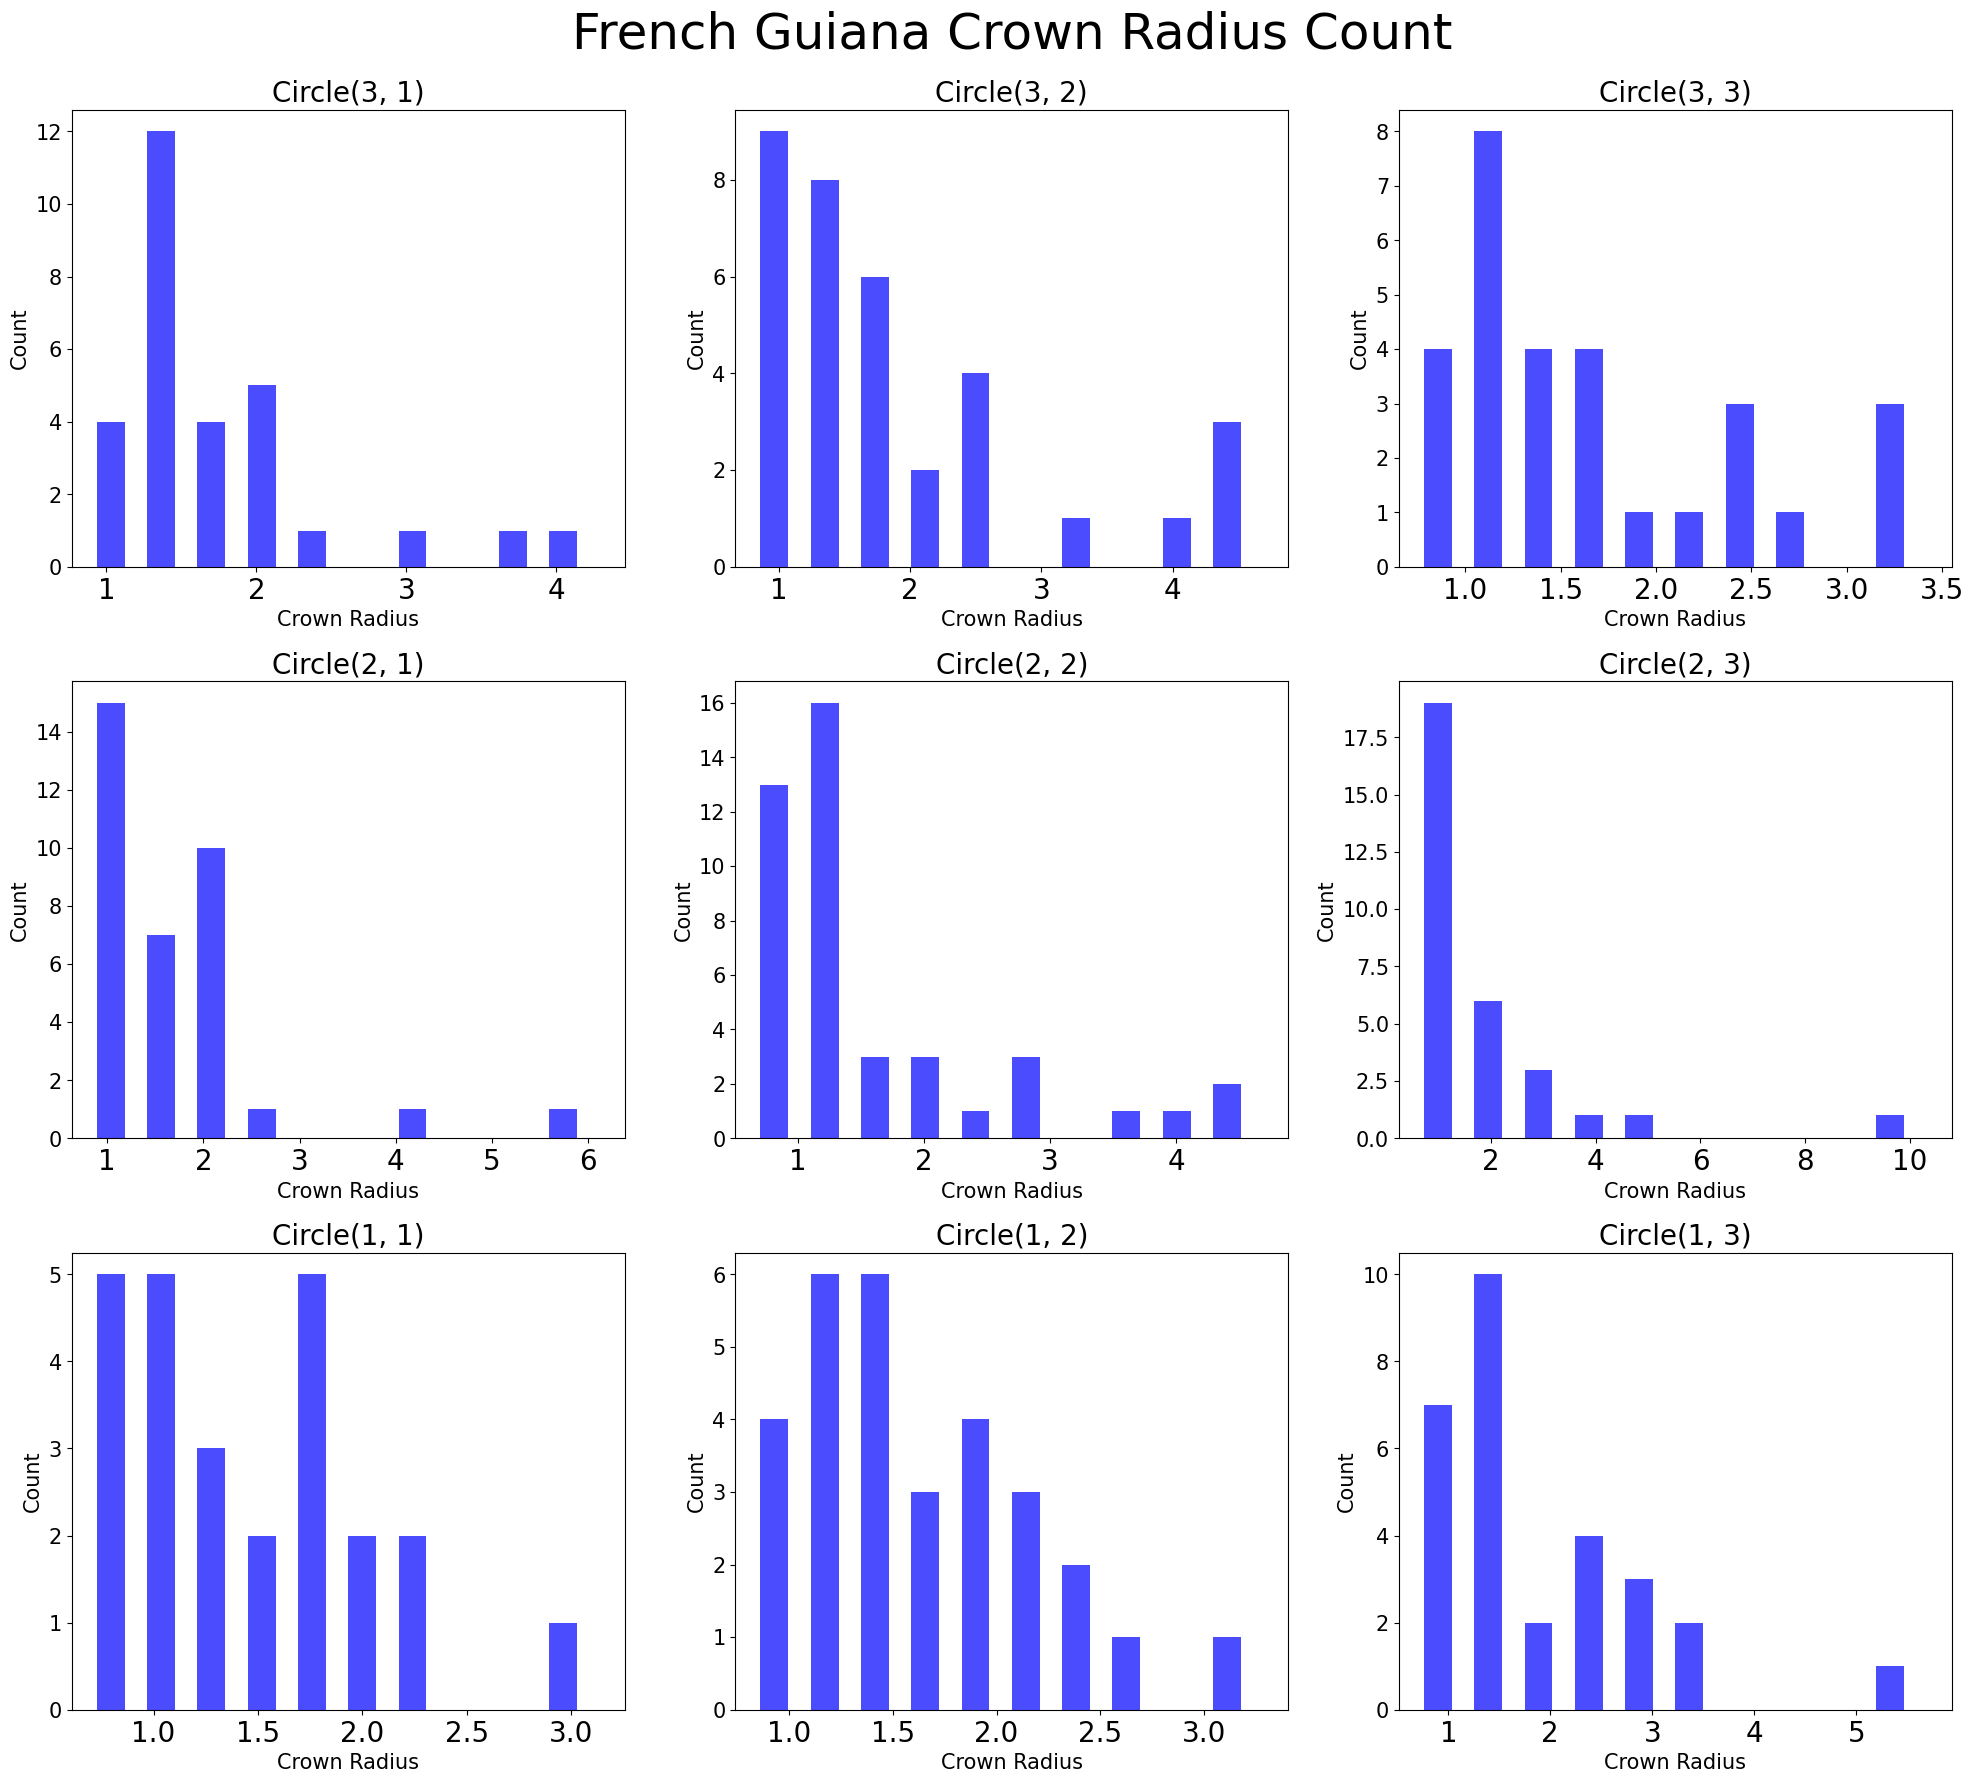

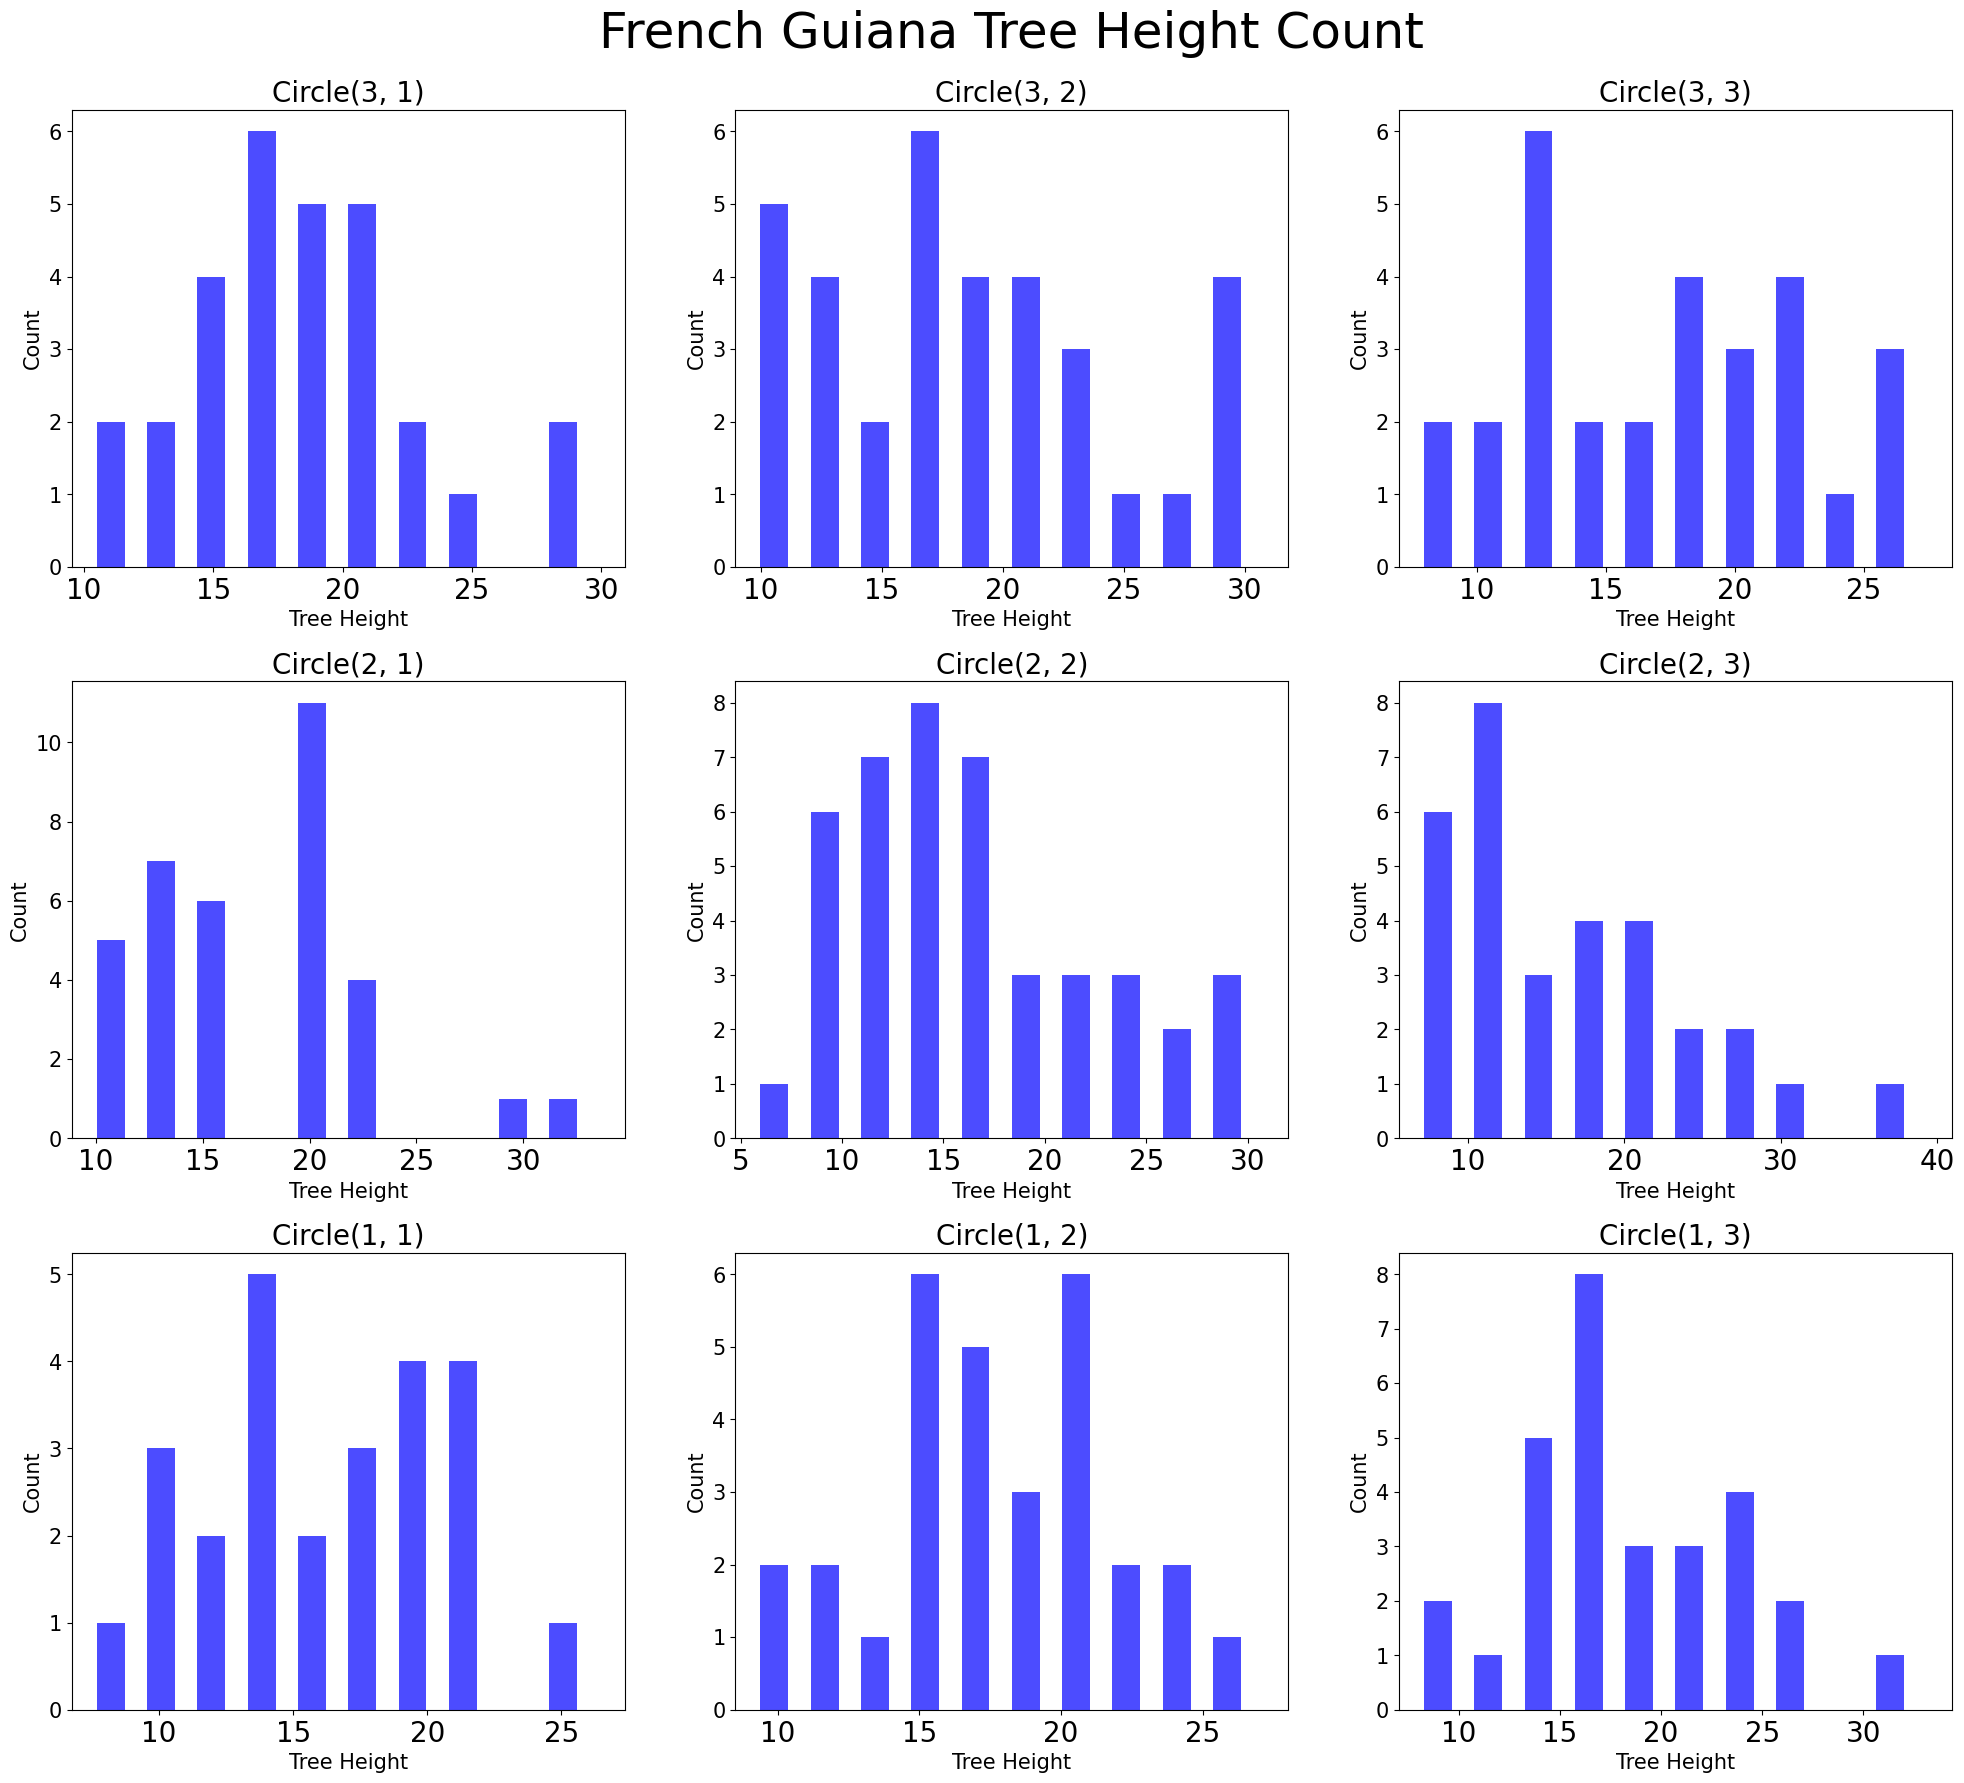

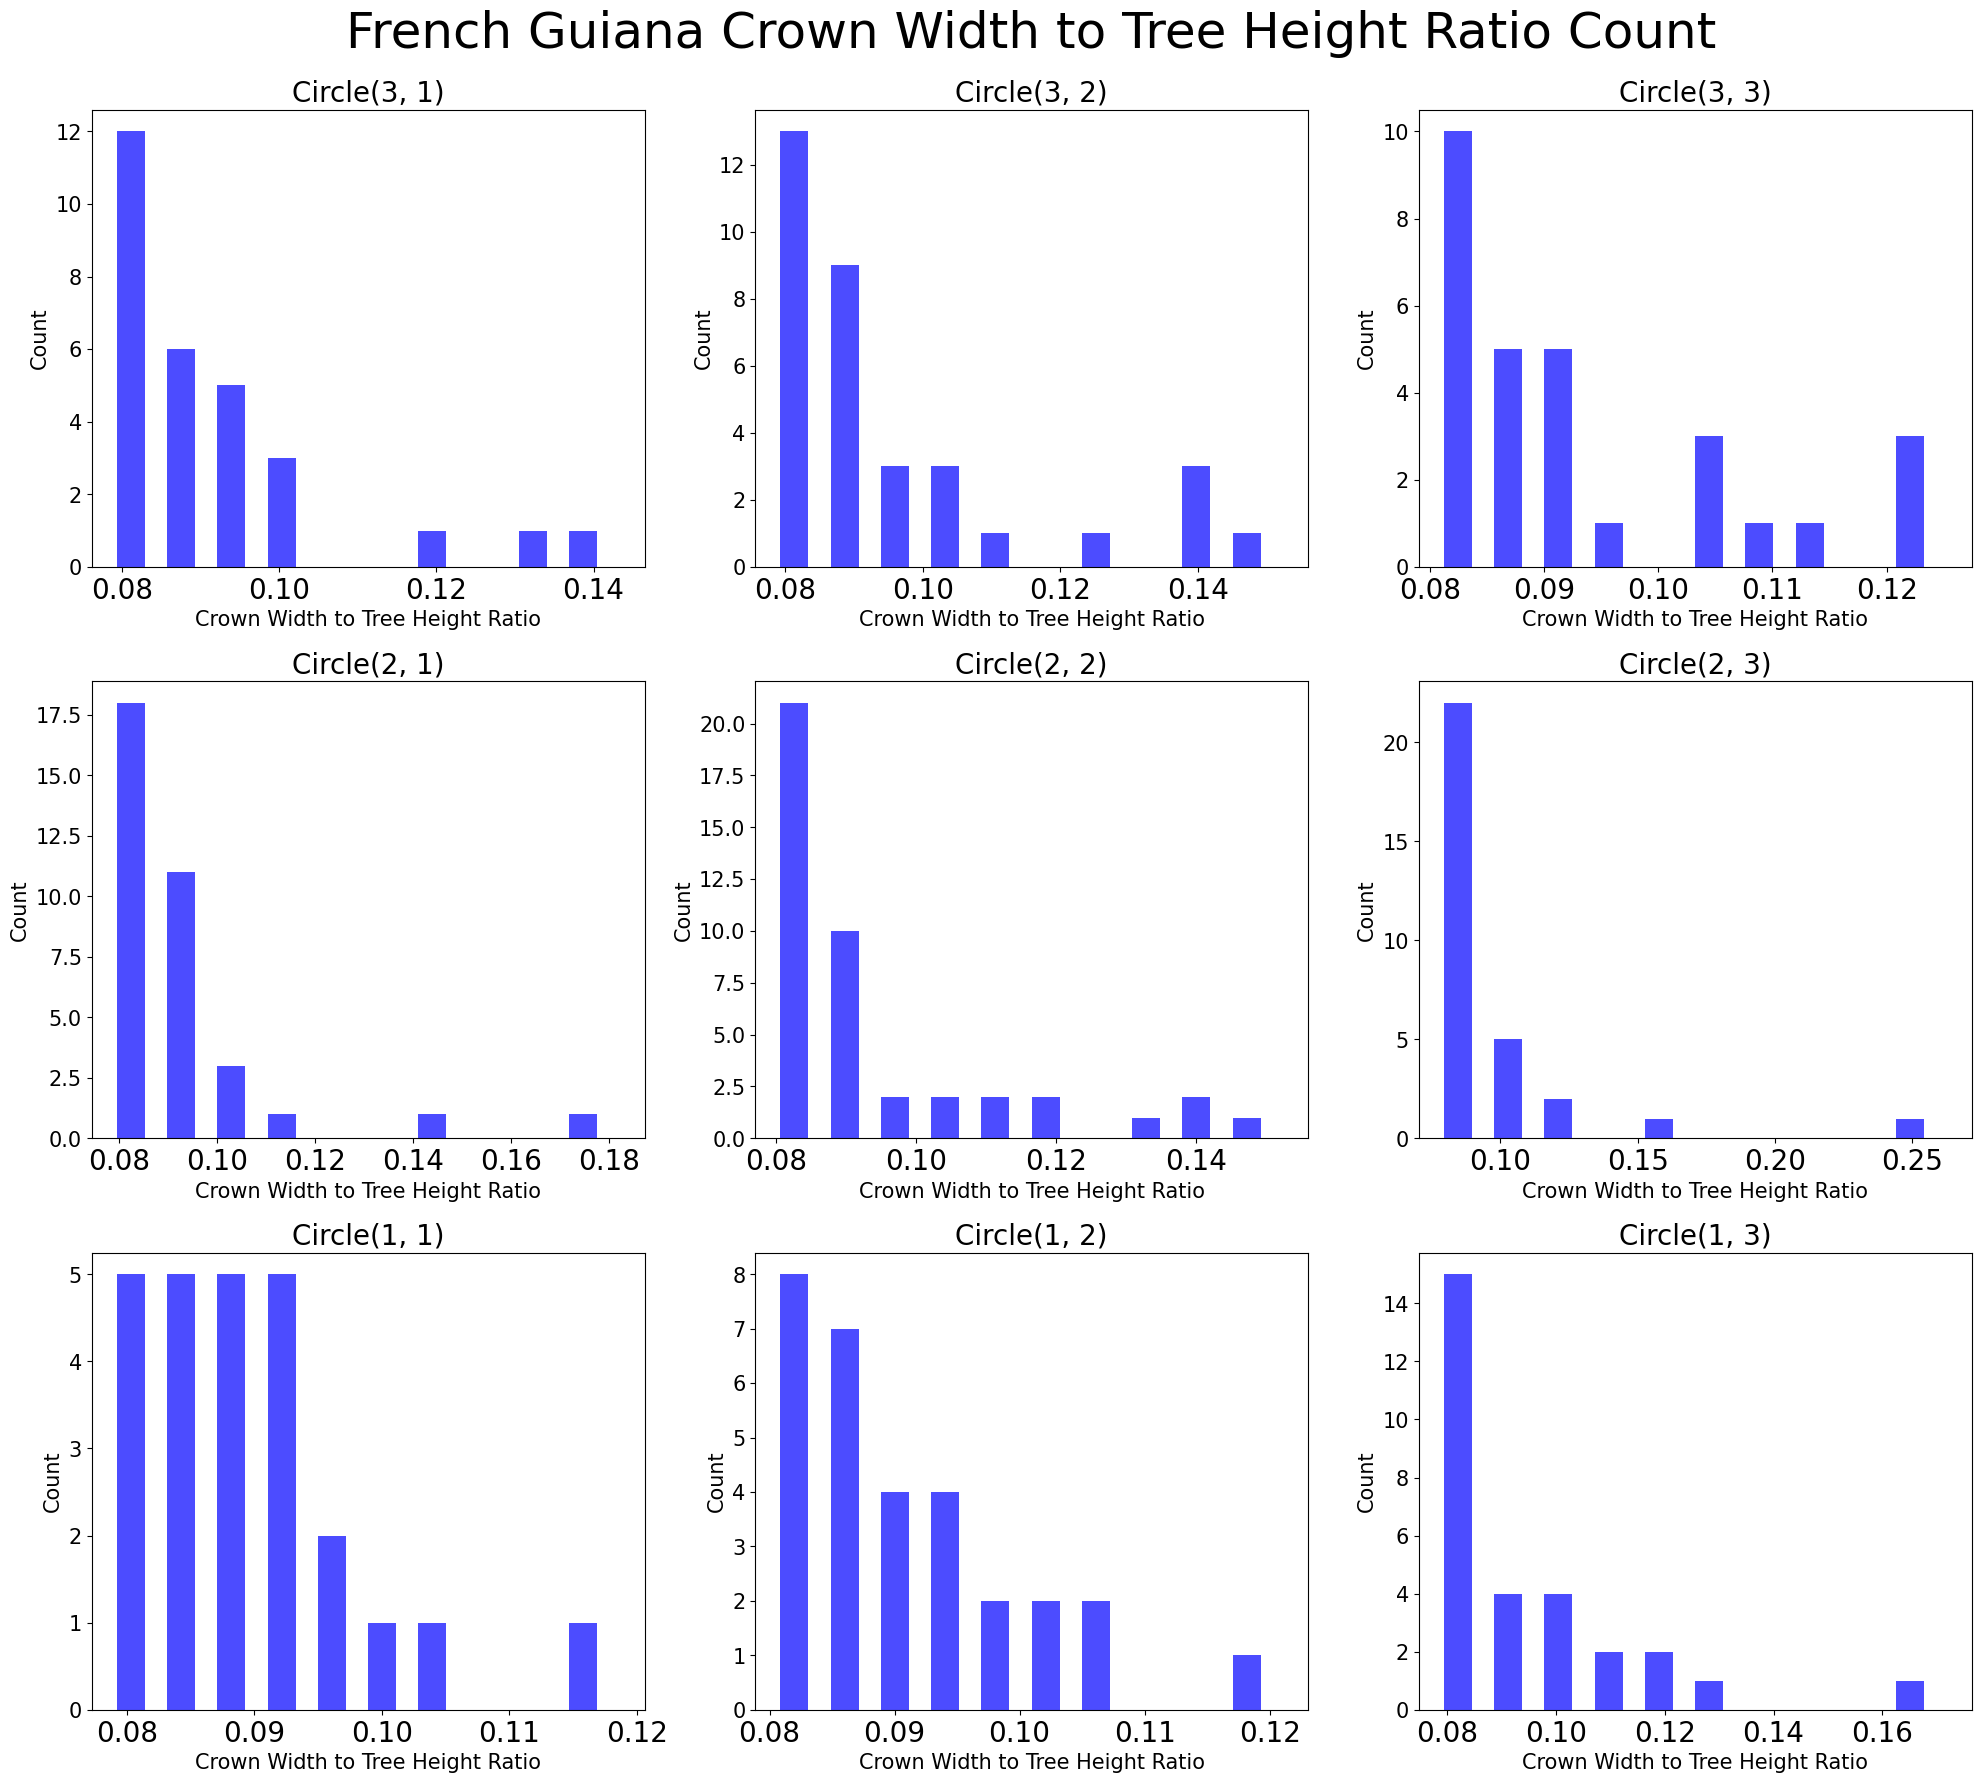

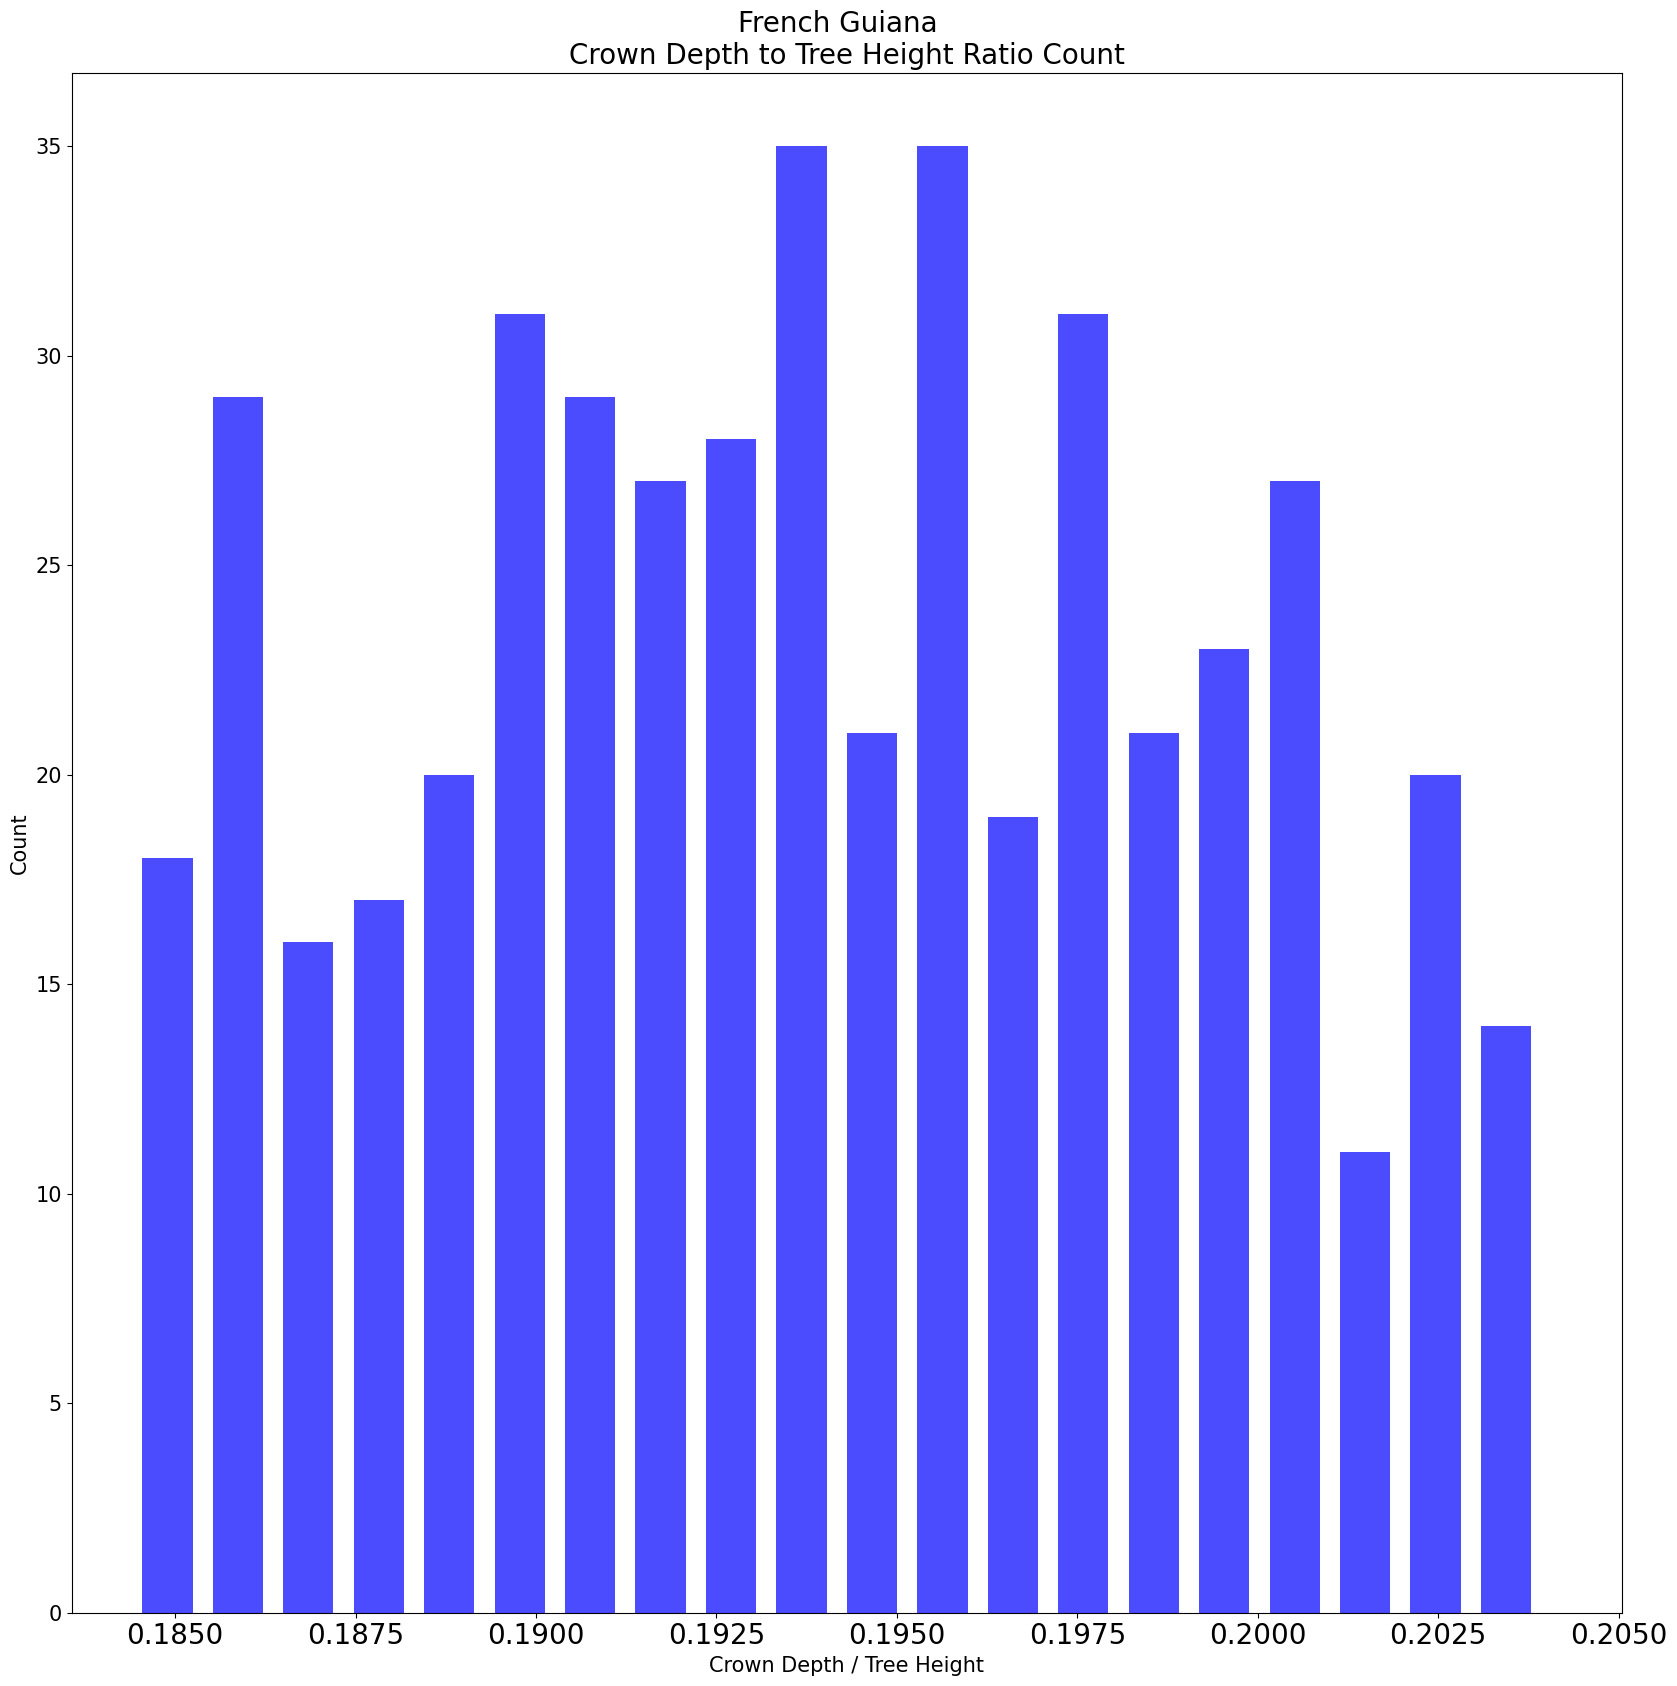

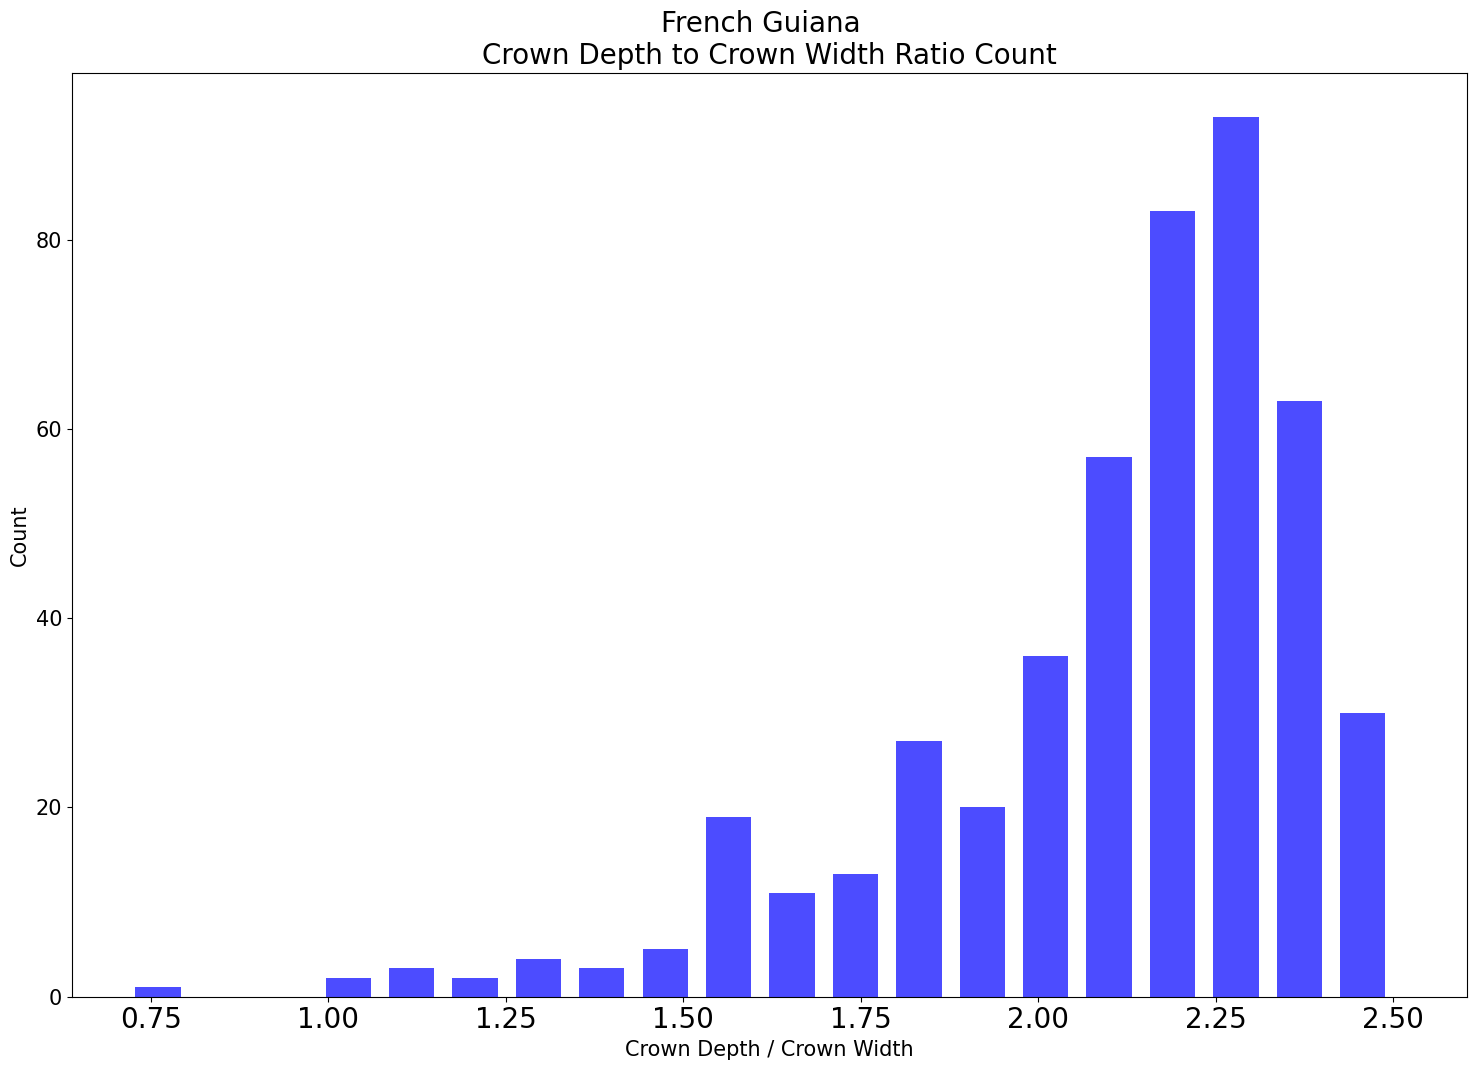

In [22]:
plot_crown_radius_count(guiana_tree_objects, guiana_circle_objects, guiana_output_file_path, "guiana_crown_radius_count.png", "French Guiana")
plot_tree_height_count(guiana_tree_objects, guiana_circle_objects, guiana_output_file_path, "guiana_tree_height_count.png", "French Guiana")
plot_crown_width_tree_height_ratio_count(guiana_tree_objects, guiana_circle_objects, guiana_output_file_path, "guiana_cr_width_tree_h_ratio_count.png", "French Guiana")
plot_crown_depth_tree_height_ratio_count(guiana_tree_objects, guiana_output_file_path, "guiana_cr_depth_tree_h_ratio_count.png", "French Guiana")
plot_crown_depth_crown_width_ratio_count(guiana_tree_objects, guiana_output_file_path, "guiana_cr_depth_cr_width_ratio_metrics.png", "French Guiana")

In [23]:
def plot_mean_std_values(circle_objects, output_folder, output_filename, plot_title):

    circle_names = [circle.circle_name for circle in circle_objects]
    mean_d1_values = [circle.mean_crown_d1 for circle in circle_objects]
    std_d1_values = [circle.std_crown_d1 for circle in circle_objects]
    mean_d2_values = [circle.mean_crown_d2 for circle in circle_objects]
    std_d2_values = [circle.std_crown_d2 for circle in circle_objects]
    mean_crown_center_height = [circle.mean_crown_center_height for circle in circle_objects]
    std_crown_center_height = [circle.std_crown_center_height for circle in circle_objects]
    mean_tree_height = [circle.mean_tree_height for circle in circle_objects]
    std_tree_height = [circle.std_tree_height for circle in circle_objects]
    LAI_per_pixel = [circle.LAI_without_branch for circle in circle_objects]
    Fa = [circle.Fa for circle in circle_objects]

    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(35, 24))

    # Set global plot parameters
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 22
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    # Plot data
    axs[0, 0].bar(circle_names, mean_d1_values, yerr=std_d1_values, capsize=5)
    axs[0, 0].set_title('Mean and Std of Vertical Crown Radius')
    axs[0, 0].set_ylabel('d1 Values')

    axs[0, 1].bar(circle_names, mean_d2_values, yerr=std_d2_values, capsize=5)
    axs[0, 1].set_title('Mean and Std of Horizontal Crown Radius')
    axs[0, 1].set_ylabel('d2 Values')

    axs[0, 2].bar(circle_names, mean_crown_center_height, yerr=std_crown_center_height, capsize=5)
    axs[0, 2].set_title('Mean and Std of Crown Center Height')
    axs[0, 2].set_ylabel('Crown Center Height Values')

    axs[1, 0].bar(circle_names, mean_tree_height, yerr=std_tree_height, capsize=5)
    axs[1, 0].set_title('Mean and Std of Tree Height')
    axs[1, 0].set_ylabel('Tree Height Values')

    axs[1, 1].bar(circle_names, LAI_per_pixel)
    axs[1, 1].set_title('LAI (leaf only) per Unit Area')
    axs[1, 1].set_ylabel('LAI (leaf only) per Pixel')

    axs[1, 2].bar(circle_names, Fa)
    axs[1, 2].set_title('Fa')
    axs[1, 2].set_ylabel('Fa Values')

    for ax in axs.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} \nMean and Std Values', x=0.5, y=0.95, fontsize=36)

    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    # Show the plot
    plt.show()

C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

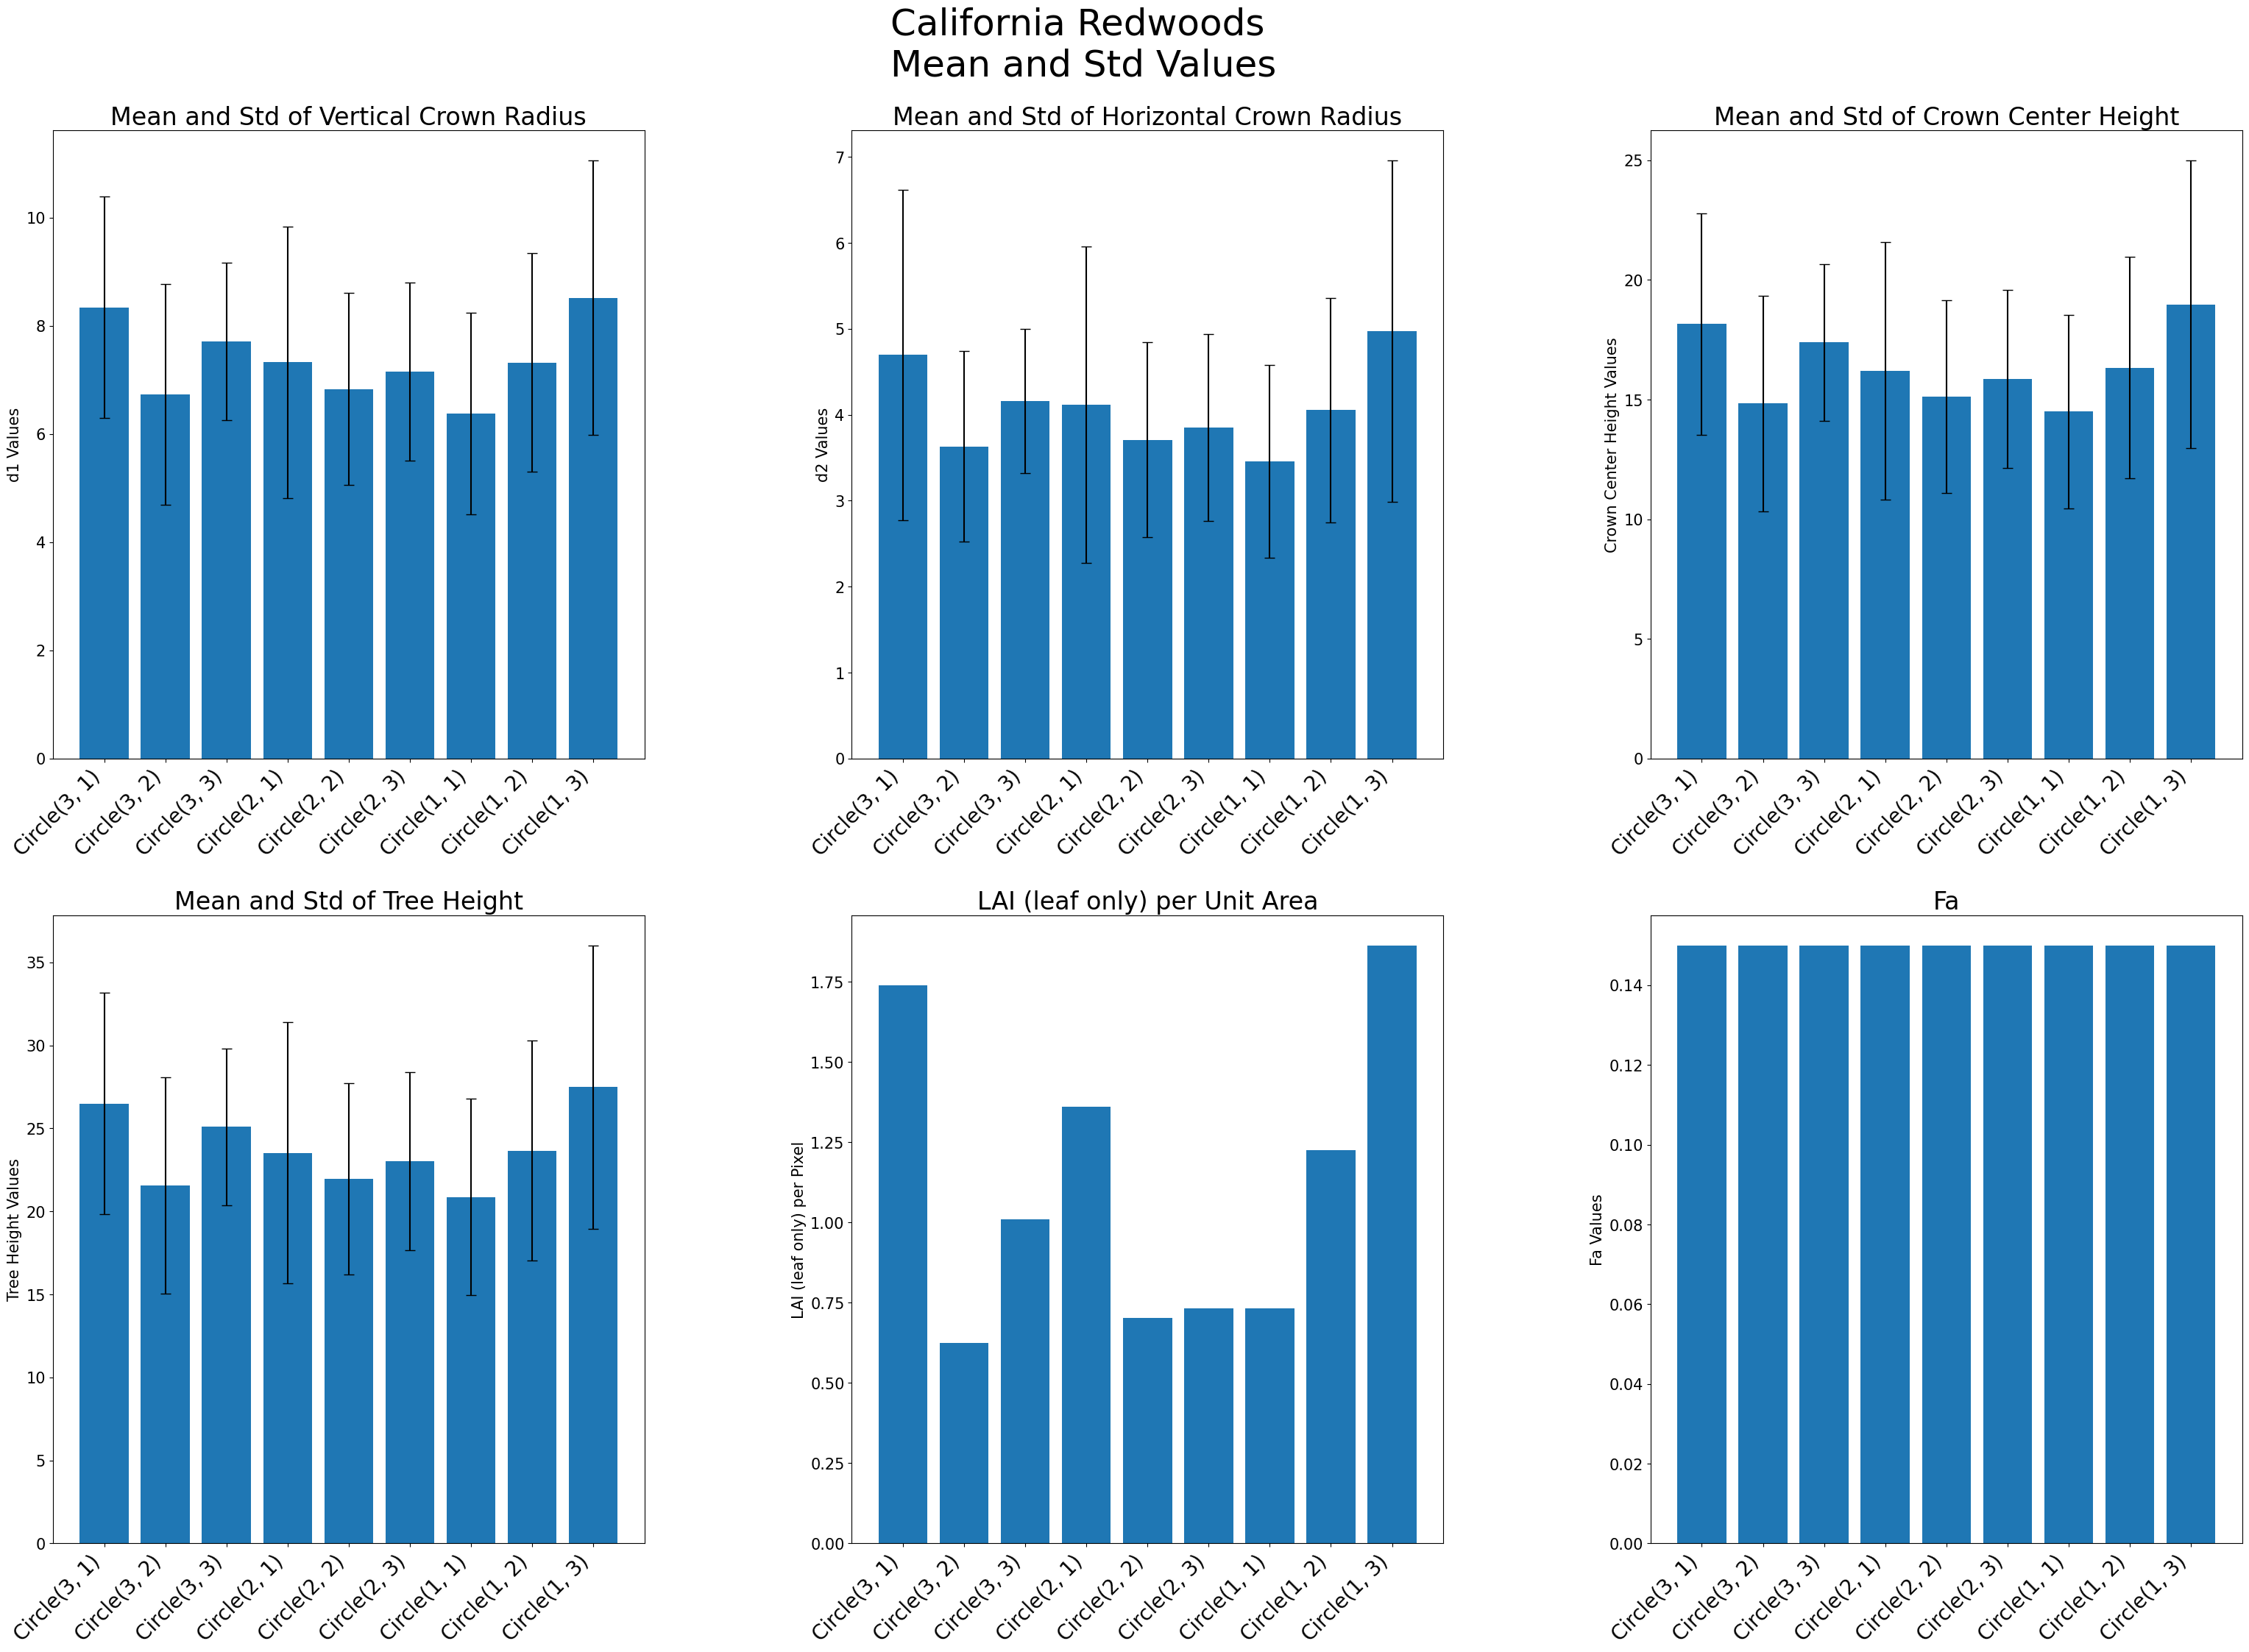

C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_4704\790705950.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

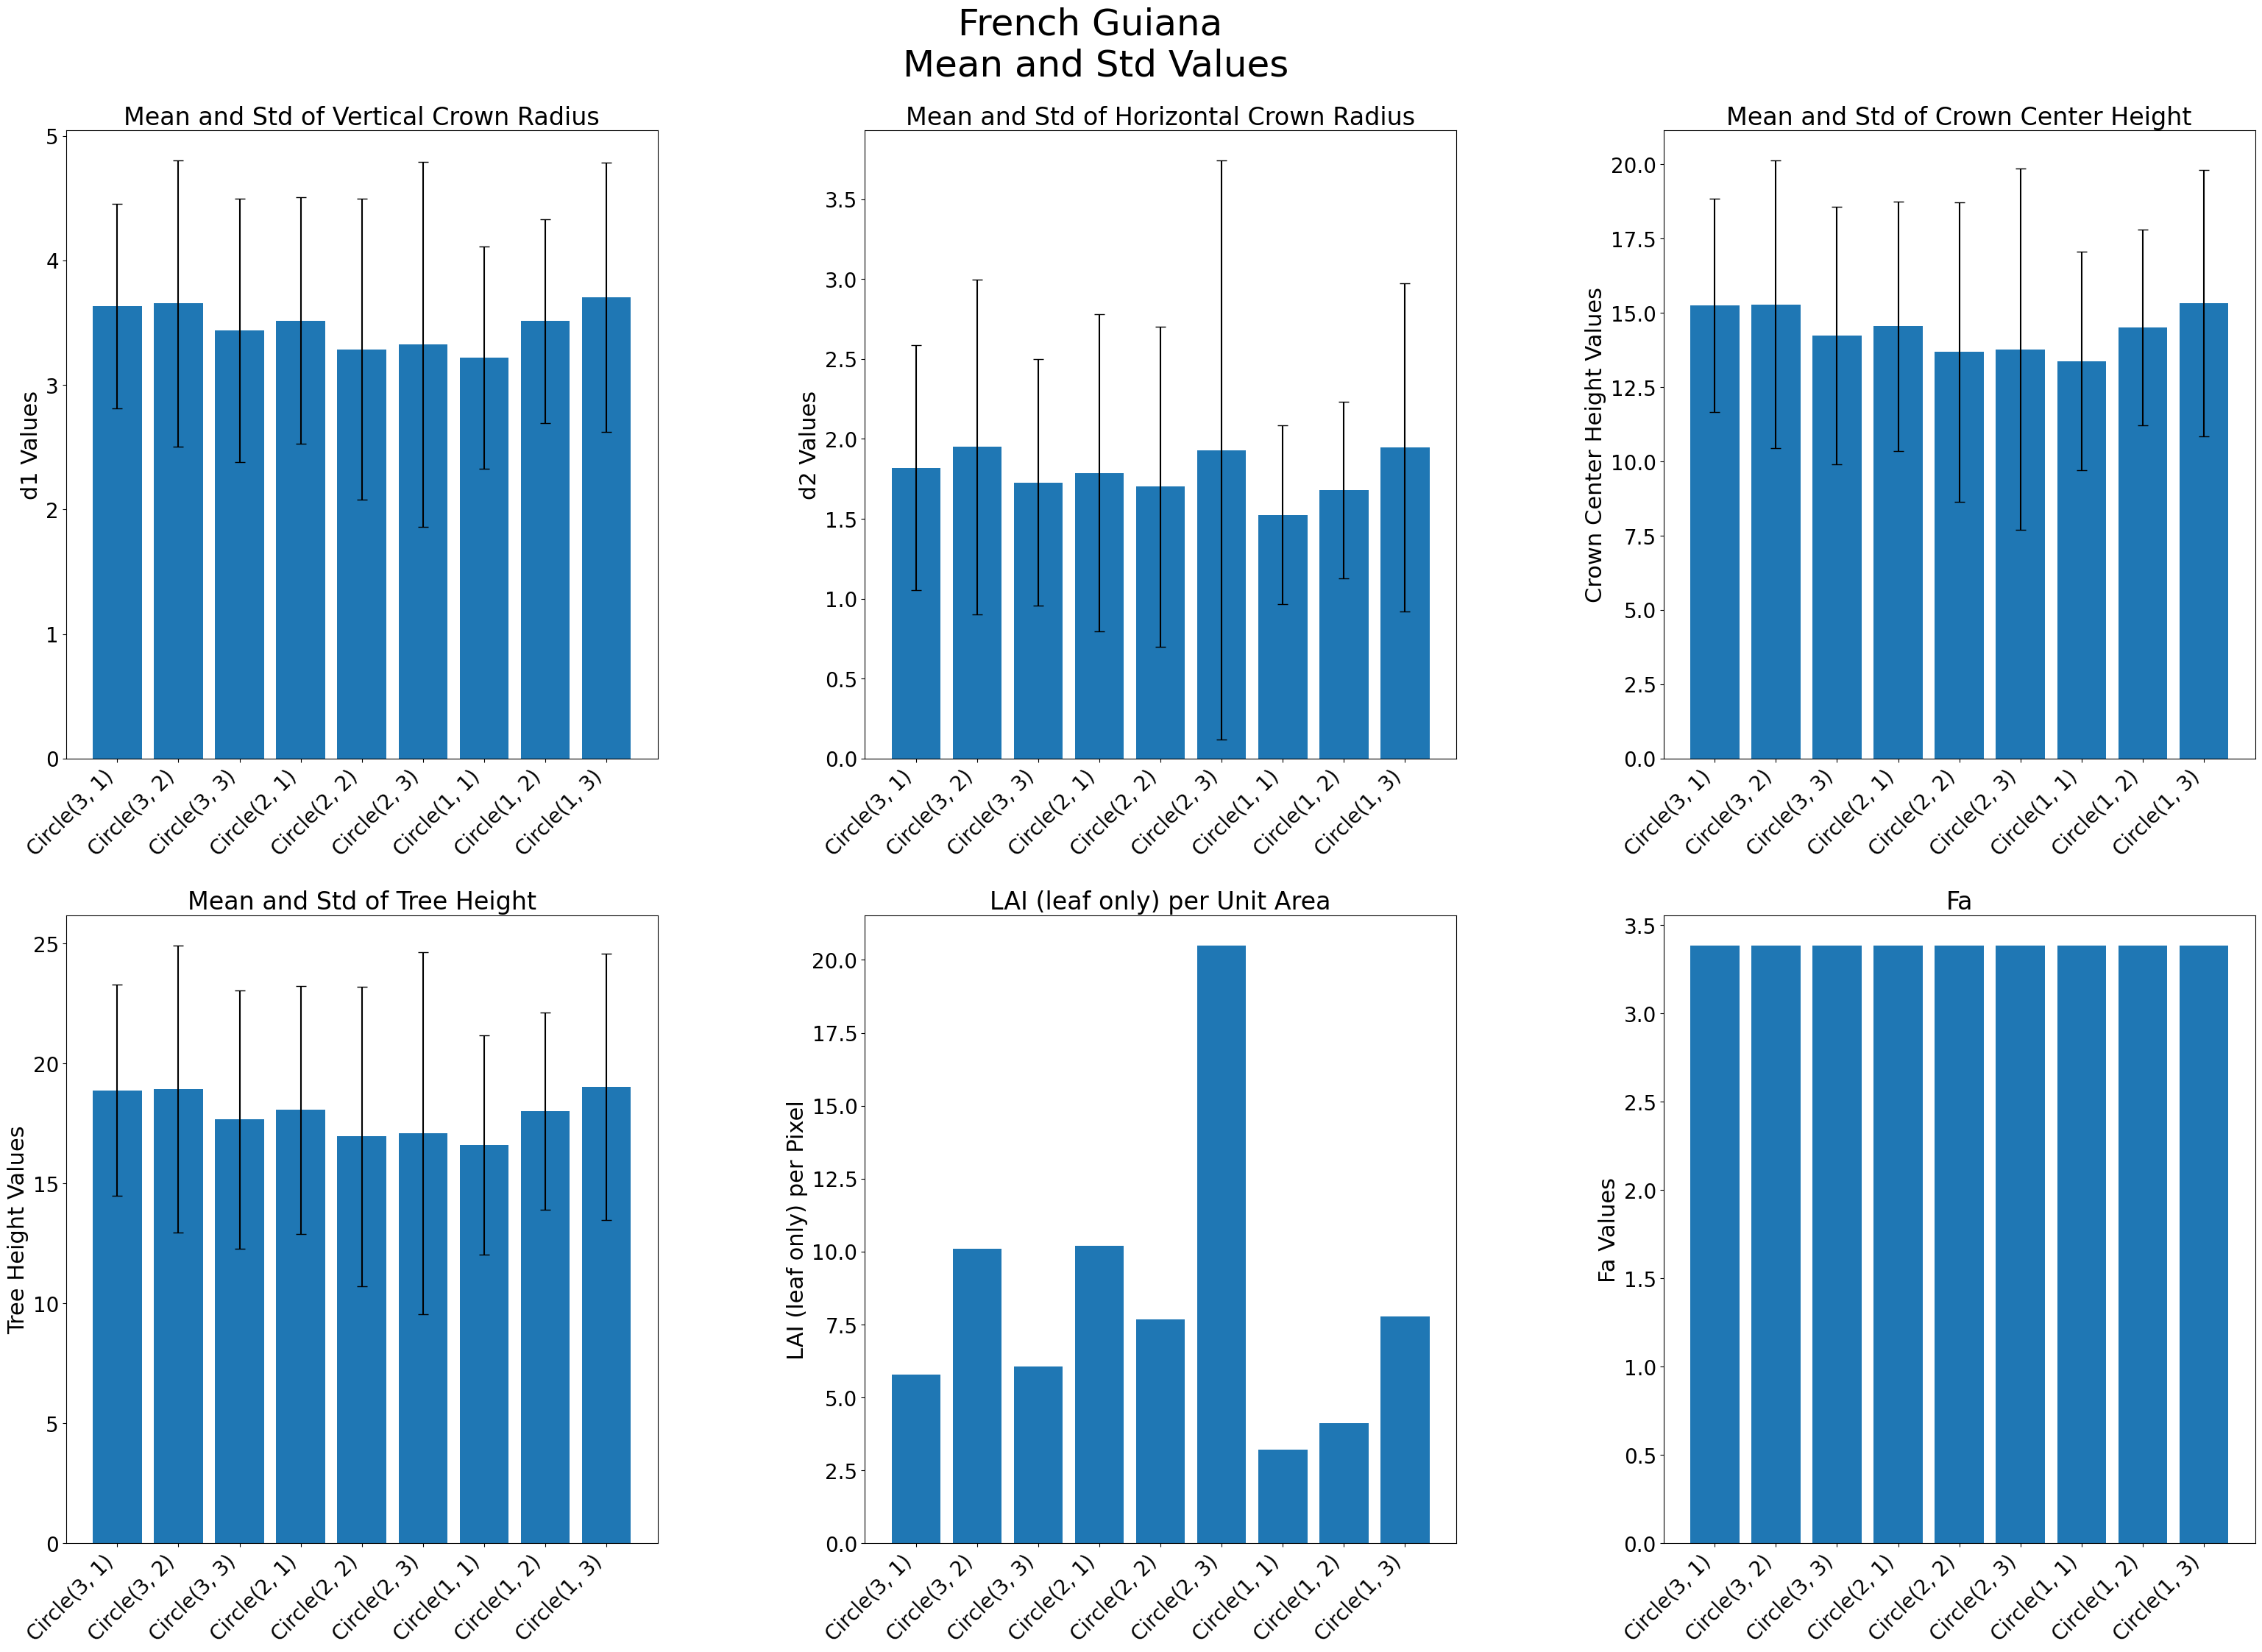

In [24]:
plot_mean_std_values(redwood_circle_objects, redwood_output_file_path, "redwood_mean_std_plots.png", "California Redwoods")
plot_mean_std_values(guiana_circle_objects, guiana_output_file_path, "guiana_mean_std_plots.png", "French Guiana")